# Remider: Final Project EDA starts from `In [50]`

# Tidy Data

In [1]:
# Import the data from excel into python.
import numpy as np
import pandas as pd
!pip install openpyxl
dataset = pd.read_excel('UN_MigrantStockTotal_2015.xlsx')
dataset.dropna()

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


Unnamed: 0                                         Unnamed: 1
14      TABLE                                              TITLE
15    Table 1  International migrant stock at mid-year by sex...
16    Table 2  Total population at mid-year by sex and by maj...
17    Table 3  International migrant stock as a percentage of...
18    Table 4  Female migrants as a percentage of the interna...
19    Table 5  Annual rate of change of the migrant stock by ...
20    Table 6  Estimated refugee stock at mid-year by major a...
21      ANNEX  Classification of countries and areas by major...
22      NOTES                                              NOTES

### Table 1

In [2]:
# Cleaning table 1 
table_1 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 1')
# Problem: Column names are values not variable names
# Delet the introduction part
table_1 = table_1.drop(labels=range(0,15), axis=0)
# Rename the coloums, B for both sexes, M for male, F for female
table_1.columns = ['Sort order', 'Area Destination', 'Notes', 'Countrycode', 'Type of data', 
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F'
                   ]
# Replace the '..' with NaN.
table_1.replace('..',np.nan,inplace = True)
table_1.head()

Sort order                                   Area Destination Notes  \
15           1                                              WORLD   NaN   
16           2                                  Developed regions   (b)   
17           3                                 Developing regions   (c)   
18           4                          Least developed countries   (d)   
19           5  Less developed regions excluding least develop...   NaN   

    Countrycode Type of data        1990B        1995B        2000B  \
15          900          NaN  152563212.0  160801752.0  172703309.0   
16          901          NaN   82378628.0   92306854.0  103375363.0   
17          902          NaN   70184584.0   68494898.0   69327946.0   
18          941          NaN   11075966.0   11711703.0   10077824.0   
19          934          NaN   59105261.0   56778501.0   59244124.0   

          2005B        2010B  ...       2000M       2005M        2010M  \
15  191269100.0  221714243.0  ...  87884839.0  97866674.0  114613714.0   
16  117181109.0  132560325.0  ...  50536796.0  57217777.0   64081077.0   
17   74087991.0   89153918.0  ...  37348043.0  40648897.0   50532637.0   
18    9809634.0   10018128.0  ...   5361902.0   5383009.0    5462714.0   
19   64272611.0   79130668.0  ...  31986141.0  35265888.0   45069923.0   

          2015M       1990F       1995F       2000F       2005F        2010F  \
15  126115435.0  74815702.0  79064275.0  84818470.0  93402426.0  107100529.0   
16   67618619.0  42115231.0  47214055.0  52838567.0  59963332.0   68479248.0   
17   58496816.0  32700471.0  31850220.0  31979903.0  33439094.0   38621281.0   
18    6463217.0   5236216.0   5573685.0   4721920.0   4432371.0    4560536.0   
19   52033599.0  27464255.0  26276535.0  27257983.0  29006723.0   34060745.0   

          2015F  
15  117584801.0  
16   72863336.0  
17   44721465.0  
18    5493028.0  
19   39228437.0  

[5 rows x 23 columns]

In [3]:
#Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
tidy_table_1 = table_1.melt(id_vars =  ['Sort order', 'Area Destination', 'Notes', 'Countrycode', 
                                        'Type of data',], var_name = "Year", value_name = "Count")
tidy_table_1.head()

Sort order                                   Area Destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Countrycode Type of data   Year        Count  
0          900          NaN  1990B  152563212.0  
1          901          NaN  1990B   82378628.0  
2          902          NaN  1990B   70184584.0  
3          941          NaN  1990B   11075966.0  
4          934          NaN  1990B   59105261.0

In [4]:
# Remove unrelated columns
tidy_table_1.drop(['Sort order','Type of data','Notes'],
            axis=1,inplace=True)
tidy_table_1.head()

Area Destination  Countrycode   Year  \
0                                              WORLD          900  1990B   
1                                  Developed regions          901  1990B   
2                                 Developing regions          902  1990B   
3                          Least developed countries          941  1990B   
4  Less developed regions excluding least develop...          934  1990B   

         Count  
0  152563212.0  
1   82378628.0  
2   70184584.0  
3   11075966.0  
4   59105261.0

In [5]:
# Problem: two variables are string in one column
# tidy data principle #2 l
# Split year and gender.
tidy_table_1=(tidy_table_1.assign(Gender = lambda x: x.Year.str[4].astype(str), Year = lambda x: x.Year.str[:4].astype(str)))
             
tidy_table_1.head()


Area Destination  Countrycode  Year  \
0                                              WORLD          900  1990   
1                                  Developed regions          901  1990   
2                                 Developing regions          902  1990   
3                          Least developed countries          941  1990   
4  Less developed regions excluding least develop...          934  1990   

         Count Gender  
0  152563212.0      B  
1   82378628.0      B  
2   70184584.0      B  
3   11075966.0      B  
4   59105261.0      B

In [6]:
# Styling the dataset
tidy_table_1=(tidy_table_1.replace(to_replace =["B","M","F"],value =["Both sexes","Male","Female"])
            .dropna())
tidy_table_1.head()

Area Destination  Countrycode  Year  \
0                                              WORLD          900  1990   
1                                  Developed regions          901  1990   
2                                 Developing regions          902  1990   
3                          Least developed countries          941  1990   
4  Less developed regions excluding least develop...          934  1990   

         Count      Gender  
0  152563212.0  Both sexes  
1   82378628.0  Both sexes  
2   70184584.0  Both sexes  
3   11075966.0  Both sexes  
4   59105261.0  Both sexes

In [7]:
#Problem: Variables are stored in both rows and columns
# tidy data principle #3 Variables need to be in cells, not rows and columns
(tidy_table_1.
 pivot_table(index = ["Area Destination","Countrycode","Year"],
             columns = "Gender",
             values = "Count").
 reset_index().head())

Gender Area Destination  Countrycode  Year  Both sexes   Female     Male
0           Afghanistan            4  1990     57686.0  25128.0  32558.0
1           Afghanistan            4  1995     71522.0  32417.0  39105.0
2           Afghanistan            4  2000     75917.0  33069.0  42848.0
3           Afghanistan            4  2005     87300.0  38026.0  49274.0
4           Afghanistan            4  2010    102246.0  44537.0  57709.0

In [8]:
# Return the total number of missing values for each row 
tidy_table_1.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4765    0
4766    0
4767    0
4768    0
4769    0
Length: 4725, dtype: int64

In [9]:
# Return the total number of missing values for each coloumns
tidy_table_1.isnull().sum(axis=0)

Area Destination    0
Countrycode         0
Year                0
Count               0
Gender              0
dtype: int64

In [10]:
# To merge 6 tables together, we need to unify the format of the six tables, thus I will use the same way as
# table 2,3,4,5 to tidy table 1 again and store as table 1.
# First drop the two coloumns: "Sort Order" and "Notes"
table_1.drop(['Sort order', 'Notes'],
            axis=1,inplace=True)
table_1.head()

Area Destination  Countrycode  \
15                                              WORLD          900   
16                                  Developed regions          901   
17                                 Developing regions          902   
18                          Least developed countries          941   
19  Less developed regions excluding least develop...          934   

   Type of data        1990B        1995B        2000B        2005B  \
15          NaN  152563212.0  160801752.0  172703309.0  191269100.0   
16          NaN   82378628.0   92306854.0  103375363.0  117181109.0   
17          NaN   70184584.0   68494898.0   69327946.0   74087991.0   
18          NaN   11075966.0   11711703.0   10077824.0    9809634.0   
19          NaN   59105261.0   56778501.0   59244124.0   64272611.0   

          2010B        2015B       1990M  ...       2000M       2005M  \
15  221714243.0  243700236.0  77747510.0  ...  87884839.0  97866674.0   
16  132560325.0  140481955.0  40263397.0  ...  50536796.0  57217777.0   
17   89153918.0  103218281.0  37484113.0  ...  37348043.0  40648897.0   
18   10018128.0   11951316.0   5843107.0  ...   5361902.0   5383009.0   
19   79130668.0   91262036.0  31641006.0  ...  31986141.0  35265888.0   

          2010M        2015M       1990F       1995F       2000F       2005F  \
15  114613714.0  126115435.0  74815702.0  79064275.0  84818470.0  93402426.0   
16   64081077.0   67618619.0  42115231.0  47214055.0  52838567.0  59963332.0   
17   50532637.0   58496816.0  32700471.0  31850220.0  31979903.0  33439094.0   
18    5462714.0    6463217.0   5236216.0   5573685.0   4721920.0   4432371.0   
19   45069923.0   52033599.0  27464255.0  26276535.0  27257983.0  29006723.0   

          2010F        2015F  
15  107100529.0  117584801.0  
16   68479248.0   72863336.0  
17   38621281.0   44721465.0  
18    4560536.0    5493028.0  
19   34060745.0   39228437.0  

[5 rows x 21 columns]

In [11]:
# Split table_1 into three data frames by both sexes, male and female
# Both sexes
# Select the columns we need store as dataframe
table_1_B = table_1[[ 'Area Destination','Countrycode','Type of data','1990B','1995B','2000B','2005B','2010B','2015B']]
# Rename the coloums 
table_1_B = table_1_B.rename(columns={'1990B': '1990','1995B': '1995', '2000B': '2000',
                                       '2005B': '2005','2010B': '2010', '2015B': '2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_1_B = table_1_B.melt(id_vars=[ 'Area Destination','Countrycode','Type of data'],
                             var_name = ["Year"], value_name = 'International Migrant Stock of Both Sexes')
table_1_B.head()

Area Destination  Countrycode  \
0                                              WORLD          900   
1                                  Developed regions          901   
2                                 Developing regions          902   
3                          Least developed countries          941   
4  Less developed regions excluding least develop...          934   

  Type of data  Year  International Migrant Stock of Both Sexes  
0          NaN  1990                                152563212.0  
1          NaN  1990                                 82378628.0  
2          NaN  1990                                 70184584.0  
3          NaN  1990                                 11075966.0  
4          NaN  1990                                 59105261.0

In [12]:
# Male
# Select the columns we need store as dataframe
table_1_M = table_1[[ 'Area Destination','Countrycode','Type of data','1990M','1995M','2000M','2005M','2010M','2015M']]
# Rename the coloums 
table_1_M = table_1_M.rename(columns={'1990M': '1990','1995M': '1995', '2000M': '2000',
                                       '2005M': '2005','2010M': '2010', '2015M': '2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_1_M = table_1_M.melt(id_vars=[ 'Area Destination','Countrycode','Type of data'],
                             var_name = ["Year"], value_name = 'International Migrant Stock of Male')
table_1_M.head()

Area Destination  Countrycode  \
0                                              WORLD          900   
1                                  Developed regions          901   
2                                 Developing regions          902   
3                          Least developed countries          941   
4  Less developed regions excluding least develop...          934   

  Type of data  Year  International Migrant Stock of Male  
0          NaN  1990                           77747510.0  
1          NaN  1990                           40263397.0  
2          NaN  1990                           37484113.0  
3          NaN  1990                            5843107.0  
4          NaN  1990                           31641006.0

In [13]:
# Female
# Select the columns we need store as dataframe
table_1_F = table_1[[ 'Area Destination','Countrycode','Type of data','1990F','1995F','2000F','2005F','2010F','2015F']]
# Rename the coloums 
table_1_F = table_1_F.rename(columns={'1990F': '1990','1995F': '1995', '2000F': '2000',
                                       '2005F': '2005','2010F': '2010', '2015F': '2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_1_F = table_1_F.melt(id_vars=[ 'Area Destination','Countrycode','Type of data'],
                             var_name = ["Year"], value_name = 'International Migrant Stock of Female')
table_1_F.head()

Area Destination  Countrycode  \
0                                              WORLD          900   
1                                  Developed regions          901   
2                                 Developing regions          902   
3                          Least developed countries          941   
4  Less developed regions excluding least develop...          934   

  Type of data  Year  International Migrant Stock of Female  
0          NaN  1990                             74815702.0  
1          NaN  1990                             42115231.0  
2          NaN  1990                             32700471.0  
3          NaN  1990                              5236216.0  
4          NaN  1990                             27464255.0

In [14]:
# Problem: A single observational units must be in one table
# tidy data principle #5 A single observational units must be in 1 table  
# Merge three dataframes and store as table 1
table_1 = table_1_B.merge(table_1_M, on=['Area Destination','Countrycode','Type of data','Year'])
table_1  = table_1_F.merge(table_1 , on=['Area Destination','Countrycode','Type of data','Year'])
table_1

Area Destination  Countrycode  \
0                                                 WORLD          900   
1                                     Developed regions          901   
2                                    Developing regions          902   
3                             Least developed countries          941   
4     Less developed regions excluding least develop...          934   
...                                                 ...          ...   
1585                                              Samoa          882   
1586                                            Tokelau          772   
1587                                              Tonga          776   
1588                                             Tuvalu          798   
1589                          Wallis and Futuna Islands          876   

     Type of data  Year  International Migrant Stock of Female  \
0             NaN  1990                             74815702.0   
1             NaN  1990                             42115231.0   
2             NaN  1990                             32700471.0   
3             NaN  1990                              5236216.0   
4             NaN  1990                             27464255.0   
...           ...   ...                                    ...   
1585            B  2015                                 2460.0   
1586            B  2015                                  254.0   
1587            B  2015                                 2604.0   
1588            C  2015                                   63.0   
1589            B  2015                                 1411.0   

      International Migrant Stock of Both Sexes  \
0                                   152563212.0   
1                                    82378628.0   
2                                    70184584.0   
3                                    11075966.0   
4                                    59105261.0   
...                                         ...   
1585                                     4929.0   
1586                                      487.0   
1587                                     5731.0   
1588                                      141.0   
1589                                     2849.0   

      International Migrant Stock of Male  
0                              77747510.0  
1                              40263397.0  
2                              37484113.0  
3                               5843107.0  
4                              31641006.0  
...                                   ...  
1585                               2469.0  
1586                                233.0  
1587                               3127.0  
1588                                 78.0  
1589                               1438.0  

[1590 rows x 7 columns]

### Table 2

In [15]:
# Cleaning table 2
table_2 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 2')
# Delet the introduction part
table_2 = table_2.drop(labels=range(0,15), axis=0)
# Rename the coloums, B for both sexes, M for male, F for female
table_2.columns = ['Sort order', 'Area Destination', 'Notes', 'Country code', 
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F'
                   ]
# Replace the '..' with NaN.
table_2.replace('..',np.nan,inplace = True)
table_2

Sort order                                   Area Destination Notes  \
15            1                                              WORLD   NaN   
16            2                                  Developed regions   (b)   
17            3                                 Developing regions   (c)   
18            4                          Least developed countries   (d)   
19            5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
275         261                                              Samoa   NaN   
276         262                                            Tokelau   NaN   
277         263                                              Tonga   NaN   
278         264                                             Tuvalu   NaN   
279         265                          Wallis and Futuna Islands   NaN   

     Country code        1990B        1995B        2000B        2005B  \
15            900  5309667.699  5735123.084  6126622.121  6519635.850   
16            901  1144463.062  1169761.211  1188811.731  1208919.509   
17            902  4165204.637  4565361.873  4937810.390  5310716.341   
18            941   510057.629   585189.354   664386.087   752804.951   
19            934  3655147.008  3980172.519  4273424.303  4557911.390   
..            ...          ...          ...          ...          ...   
275           882      162.865      170.158      174.614      179.928   
276           772        1.609        1.520        1.552        1.210   
277           776       95.152       95.889       97.898      100.858   
278           798        9.004        9.227        9.419        9.694   
279           876       13.880       14.143       14.497       14.246   

           2010B        2015B  ...        2000M        2005M        2010M  \
15   6929725.043  7349472.099  ...  3084537.662  3285082.249  3493956.904   
16   1233375.711  1251351.086  ...   578010.218   587962.213   599955.476   
17   5696349.332  6098121.013  ...  2506527.444  2697120.036  2894001.428   
18    847254.847   954157.804  ...   331482.475   375757.715   422397.532   
19   4849094.485  5143963.209  ...  2175044.969  2321362.321  2471603.896   
..           ...          ...  ...          ...          ...          ...   
275      186.029      193.228  ...       90.932       93.185       95.950   
276        1.135        1.250  ...          NaN          NaN          NaN   
277      103.947      106.170  ...       49.788       50.574       52.055   
278        9.827        9.916  ...          NaN          NaN          NaN   
279       13.565       13.151  ...          NaN          NaN          NaN   

           2015M        1990F        1995F        2000F        2005F  \
15   3707205.753  2639243.998  2848487.191  3042084.459  3234553.601   
16    609297.148   589207.436   601492.755   610801.513   620957.296   
17   3097908.605  2050036.562  2246994.436  2431282.946  2613596.305   
18    476031.179   256015.073   293162.612   332903.612   377047.236   
19   2621877.426  1794021.489  1953831.824  2098379.334  2236549.069   
..           ...          ...          ...          ...          ...   
275       99.644       77.856       81.670       83.682       86.743   
276          NaN          NaN          NaN          NaN          NaN   
277       53.239       46.905       47.275       48.110       50.284   
278          NaN          NaN          NaN          NaN          NaN   
279          NaN          NaN          NaN          NaN          NaN   

           2010F        2015F  
15   3435768.139  3642266.346  
16    633420.235   642053.938  
17   2802347.904  3000212.408  
18    424857.315   478126.625  
19   2377490.589  2522085.783  
..           ...          ...  
275       90.079       93.584  
276          NaN          NaN  
277       51.892       52.931  
278          NaN          NaN  
279          NaN          NaN  

[265 rows x 22 columns]

In [16]:
#Split table_2 into three dataframes by both sexes, male and female
# Both sexes
# Select the columns we need store as dataframe
table_2_B = table_2[['Sort order', 'Area Destination','Notes', 'Country code','1990B','1995B',
                     '2000B','2005B','2010B','2015B']]
# Rename the coloums 
table_2_B = table_2_B.rename(columns={'1990B': '1990','1995B': '1995', '2000B': '2000',
                                       '2005B': '2005','2010B': '2010', '2015B': '2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_2_B = table_2_B.melt(id_vars=["Sort order", "Area Destination", "Notes", "Country code"],
                             var_name = ["Year"], value_name = 'Total population at mid-year of Both Sexes')
table_2_B.head()

Sort order                                   Area Destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country code  Year  Total population at mid-year of Both Sexes  
0           900  1990                                 5309667.699  
1           901  1990                                 1144463.062  
2           902  1990                                 4165204.637  
3           941  1990                                  510057.629  
4           934  1990                                 3655147.008

In [17]:
# Male
# Select the columns we need store as dataframe
table_2_M = table_2[['Sort order', 'Area Destination','Notes', 'Country code','1990M','1995M',
                     '2000M','2005M','2010M','2015M']]
# Rename the coloums 
table_2_M = table_2_M.rename(columns={'1990M': '1990','1995M': '1995', '2000M': '2000',
                                       '2005M': '2005','2010M': '2010', '2015M': '2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_2_M = table_2_M.melt(id_vars=["Sort order", "Area Destination", "Notes", "Country code"],
                             var_name = ["Year"], value_name = 'Total population at mid-year of Male')
table_2_M.head()

Sort order                                   Area Destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country code  Year  Total population at mid-year of Male  
0           900  1990                           2670423.701  
1           901  1990                            555255.626  
2           902  1990                           2115168.075  
3           941  1990                            254042.556  
4           934  1990                           1861125.519

In [18]:
# Female
# Select the columns we need store as dataframe
table_2_F = table_2[['Sort order', 'Area Destination','Notes', 'Country code','1990F','1995F','2000F','2005F','2010F','2015F']]
# Rename the coloums 
table_2_F = table_2_F.rename(columns={'1990F': '1990','1995F': '1995', '2000F': '2000',
                                       '2005F': '2005','2010F': '2010', '2015F': '2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_2_F = table_2_F.melt(id_vars=["Sort order", "Area Destination", "Notes", "Country code"],
                             var_name = ["Year"], value_name = 'Total population at mid-year of Female')
table_2_F.head()

Sort order                                   Area Destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country code  Year  Total population at mid-year of Female  
0           900  1990                             2639243.998  
1           901  1990                              589207.436  
2           902  1990                             2050036.562  
3           941  1990                              256015.073  
4           934  1990                             1794021.489

In [19]:
# Problem: A single observational units must be in one table
# tidy data principle #5 A single observational units must be in 1 table  
# Merge three dataframes and store as table 2.
table_2 = table_2_B.merge(table_2_M, on=['Sort order','Area Destination','Notes', 'Country code','Year'])
table_2  = table_2_F.merge(table_2 , on=['Sort order','Area Destination','Notes', 'Country code', 'Year'])
table_2.head()

Sort order                                   Area Destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country code  Year  Total population at mid-year of Female  \
0           900  1990                             2639243.998   
1           901  1990                              589207.436   
2           902  1990                             2050036.562   
3           941  1990                              256015.073   
4           934  1990                             1794021.489   

   Total population at mid-year of Both Sexes  \
0                                 5309667.699   
1                                 1144463.062   
2                                 4165204.637   
3                                  510057.629   
4                                 3655147.008   

   Total population at mid-year of Male  
0                           2670423.701  
1                            555255.626  
2                           2115168.075  
3                            254042.556  
4                           1861125.519

In [20]:
# Remove inrelevant columns
table_2.drop(['Sort order','Notes'],
            axis=1,inplace=True)
# Rename the coloumns
table_2 = table_2.rename(columns={'Count of Female': 'Population of Female',
                                  'Count of Both Sexes': 'Population of Both Sexes', 
                                  'Count of Male': 'Population of Male'})
table_2

Area Destination  Country code  Year  \
0                                                 WORLD           900  1990   
1                                     Developed regions           901  1990   
2                                    Developing regions           902  1990   
3                             Least developed countries           941  1990   
4     Less developed regions excluding least develop...           934  1990   
...                                                 ...           ...   ...   
1585                                              Samoa           882  2015   
1586                                            Tokelau           772  2015   
1587                                              Tonga           776  2015   
1588                                             Tuvalu           798  2015   
1589                          Wallis and Futuna Islands           876  2015   

      Total population at mid-year of Female  \
0                                2639243.998   
1                                 589207.436   
2                                2050036.562   
3                                 256015.073   
4                                1794021.489   
...                                      ...   
1585                                  93.584   
1586                                     NaN   
1587                                  52.931   
1588                                     NaN   
1589                                     NaN   

      Total population at mid-year of Both Sexes  \
0                                    5309667.699   
1                                    1144463.062   
2                                    4165204.637   
3                                     510057.629   
4                                    3655147.008   
...                                          ...   
1585                                     193.228   
1586                                       1.250   
1587                                     106.170   
1588                                       9.916   
1589                                      13.151   

      Total population at mid-year of Male  
0                              2670423.701  
1                               555255.626  
2                              2115168.075  
3                               254042.556  
4                              1861125.519  
...                                    ...  
1585                                99.644  
1586                                   NaN  
1587                                53.239  
1588                                   NaN  
1589                                   NaN  

[1590 rows x 6 columns]

In [21]:
# Return the total number of NaN values for each coloumns
table_2.isnull().sum(axis=0)

Area Destination                                0
Country code                                    0
Year                                            0
Total population at mid-year of Female        192
Total population at mid-year of Both Sexes      0
Total population at mid-year of Male          192
dtype: int64

### Table 3

In [22]:
# Cleaning table 3 
table_3 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 3')
table_3
# Delet the introduction part
table_3 = table_3.drop(labels=range(0,15), axis=0)
# Rename the coloums, B for both sexes, M for male, F for female
table_3.columns = ['Sort order', 'Area Destination', 'Notes', 'Country code', 'Type of data',
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F',
                   ]

# Replace the '..' with NaN.
table_3.replace('..',np.nan,inplace = True)
table_3

Sort order                                   Area Destination Notes  \
15            1                                              WORLD   NaN   
16            2                                  Developed regions   (b)   
17            3                                 Developing regions   (c)   
18            4                          Least developed countries   (d)   
19            5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
275         261                                              Samoa   NaN   
276         262                                            Tokelau   NaN   
277         263                                              Tonga   NaN   
278         264                                             Tuvalu   NaN   
279         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data      1990B      1995B      2000B      2005B  \
15            900          NaN   2.873310   2.803806   2.818899   2.933739   
16            901          NaN   7.198015   7.891085   8.695688   9.693045   
17            902          NaN   1.685021   1.500317   1.404022   1.395066   
18            941          NaN   2.171513   2.001353   1.516863   1.303078   
19            934          NaN   1.617042   1.426534   1.386338   1.410133   
..            ...          ...        ...        ...        ...        ...   
275           882            B   2.061216   2.758613   3.435005   3.193500   
276           772            B  16.780609  17.500000  16.881443  21.322314   
277           776            B   3.059316   3.414365   3.763100   4.264411   
278           798            C   3.531764   2.850331   2.303854   1.887766   
279           876            B  10.100865  11.878668  13.899427  16.601151   

         2010B  ...     2000M     2005M      2010M      2015M     1990F  \
15    3.199467  ...  2.849206  2.979124   3.280341   3.401900  2.834740   
16   10.747765  ...  8.743236  9.731540  10.680972  11.097807  7.147777   
17    1.565106  ...  1.490031  1.507122   1.746117   1.888268  1.595116   
18    1.182422  ...  1.617552  1.432574   1.293264   1.357730  2.045276   
19    1.631865  ...  1.470597  1.519189   1.823509   1.984593  1.530877   
..         ...  ...       ...       ...        ...        ...       ...   
275   2.753334  ...  3.410241  3.155014   2.703491   2.477821  2.037094   
276  37.797357  ...       NaN       NaN        NaN        NaN       NaN   
277   4.831308  ...  3.978870  4.603156   5.238690   5.873514  3.033792   
278   1.567111  ...       NaN       NaN        NaN        NaN       NaN   
279  20.464431  ...       NaN       NaN        NaN        NaN       NaN   

        1995F     2000F     2005F      2010F      2015F  
15   2.775658  2.788169  2.887645   3.117222   3.228342  
16   7.849480  8.650694  9.656595  10.811029  11.348476  
17   1.417459  1.315351  1.279428   1.378176   1.490610  
18   1.901226  1.418405  1.175548   1.073428   1.148865  
19   1.344872  1.299002  1.296941   1.432634   1.555397  
..        ...       ...       ...        ...        ...  
275  2.746419  3.461915  3.234843   2.806425   2.628654  
276       NaN       NaN       NaN        NaN        NaN  
277  3.291380  3.539805  3.923713   4.422647   4.919612  
278       NaN       NaN       NaN        NaN        NaN  
279       NaN       NaN       NaN        NaN        NaN  

[265 rows x 23 columns]

In [23]:
# Remove inrelevant columns
table_3.drop(['Sort order', 'Notes'],
            axis=1,inplace=True)
table_3

Area Destination  Country code  \
15                                               WORLD           900   
16                                   Developed regions           901   
17                                  Developing regions           902   
18                           Least developed countries           941   
19   Less developed regions excluding least develop...           934   
..                                                 ...           ...   
275                                              Samoa           882   
276                                            Tokelau           772   
277                                              Tonga           776   
278                                             Tuvalu           798   
279                          Wallis and Futuna Islands           876   

    Type of data      1990B      1995B      2000B      2005B      2010B  \
15           NaN   2.873310   2.803806   2.818899   2.933739   3.199467   
16           NaN   7.198015   7.891085   8.695688   9.693045  10.747765   
17           NaN   1.685021   1.500317   1.404022   1.395066   1.565106   
18           NaN   2.171513   2.001353   1.516863   1.303078   1.182422   
19           NaN   1.617042   1.426534   1.386338   1.410133   1.631865   
..           ...        ...        ...        ...        ...        ...   
275            B   2.061216   2.758613   3.435005   3.193500   2.753334   
276            B  16.780609  17.500000  16.881443  21.322314  37.797357   
277            B   3.059316   3.414365   3.763100   4.264411   4.831308   
278            C   3.531764   2.850331   2.303854   1.887766   1.567111   
279            B  10.100865  11.878668  13.899427  16.601151  20.464431   

         2015B     1990M  ...     2000M     2005M      2010M      2015M  \
15    3.315888  2.911430  ...  2.849206  2.979124   3.280341   3.401900   
16   11.226422  7.251326  ...  8.743236  9.731540  10.680972  11.097807   
17    1.692624  1.772158  ...  1.490031  1.507122   1.746117   1.888268   
18    1.252551  2.300050  ...  1.617552  1.432574   1.293264   1.357730   
19    1.774158  1.700101  ...  1.470597  1.519189   1.823509   1.984593   
..         ...       ...  ...       ...       ...        ...        ...   
275   2.550873  2.083309  ...  3.410241  3.155014   2.703491   2.477821   
276  38.960000       NaN  ...       NaN       NaN        NaN        NaN   
277   5.397947  3.084130  ...  3.978870  4.603156   5.238690   5.873514   
278   1.421944       NaN  ...       NaN       NaN        NaN        NaN   
279  21.663752       NaN  ...       NaN       NaN        NaN        NaN   

        1990F     1995F     2000F     2005F      2010F      2015F  
15   2.834740  2.775658  2.788169  2.887645   3.117222   3.228342  
16   7.147777  7.849480  8.650694  9.656595  10.811029  11.348476  
17   1.595116  1.417459  1.315351  1.279428   1.378176   1.490610  
18   2.045276  1.901226  1.418405  1.175548   1.073428   1.148865  
19   1.530877  1.344872  1.299002  1.296941   1.432634   1.555397  
..        ...       ...       ...       ...        ...        ...  
275  2.037094  2.746419  3.461915  3.234843   2.806425   2.628654  
276       NaN       NaN       NaN       NaN        NaN        NaN  
277  3.033792  3.291380  3.539805  3.923713   4.422647   4.919612  
278       NaN       NaN       NaN       NaN        NaN        NaN  
279       NaN       NaN       NaN       NaN        NaN        NaN  

[265 rows x 21 columns]

In [24]:
# Return the total number of missing values for each coloums
table_3.isnull().sum(axis=0)

Area Destination     0
Country code         0
Type of data        33
1990B                5
1995B                5
2000B                5
2005B                4
2010B                0
2015B                0
1990M               35
1995M               35
2000M               35
2005M               35
2010M               32
2015M               32
1990F               35
1995F               35
2000F               35
2005F               35
2010F               32
2015F               32
dtype: int64

In [25]:
#Split table_3 into three dataframes by both sexes, male and female
# Both sexes
# Select the columns we need store as dataframe
table_3_B = table_3[['Area Destination','Country code','Type of data','1990B','1995B','2000B','2005B','2010B','2015B']]
# Rename the coloums
table_3_B = table_3_B.rename(columns={'1990B': '1990','1995B': '1995', '2000B': '2000',
                                       '2005B': '2005','2010B': '2010', '2015B': '2015'})
# Problem: Column names are values not variable names
# Problem: A single observational units must be in one table
table_3_B = table_3_B.melt(id_vars=['Area Destination','Country code','Type of data',],
                             var_name = ["Year"], value_name = 'International migrant stock as a percentage of Both Sexes')
table_3_B.head()

Area Destination  Country code  \
0                                              WORLD           900   
1                                  Developed regions           901   
2                                 Developing regions           902   
3                          Least developed countries           941   
4  Less developed regions excluding least develop...           934   

  Type of data  Year  \
0          NaN  1990   
1          NaN  1990   
2          NaN  1990   
3          NaN  1990   
4          NaN  1990   

   International migrant stock as a percentage of Both Sexes  
0                                           2.873310          
1                                           7.198015          
2                                           1.685021          
3                                           2.171513          
4                                           1.617042

In [26]:
# Male
# Select the columns we need store as dataframe
table_3_M = table_3[['Area Destination','Country code','Type of data','1990M','1995M','2000M','2005M','2010M','2015M']]
# Rename the coloums
table_3_M = table_3_M.rename(columns={'1990M': '1990','1995M': '1995', '2000M': '2000',
                                       '2005M': '2005','2010M': '2010', '2015M': '2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_3_M = table_3_M.melt(id_vars=[ 'Area Destination','Country code','Type of data',],
                             var_name = ["Year"], value_name = 'International migrant stock as a percentage of Male')
table_3_M.head()

Area Destination  Country code  \
0                                              WORLD           900   
1                                  Developed regions           901   
2                                 Developing regions           902   
3                          Least developed countries           941   
4  Less developed regions excluding least develop...           934   

  Type of data  Year  International migrant stock as a percentage of Male  
0          NaN  1990                                           2.911430    
1          NaN  1990                                           7.251326    
2          NaN  1990                                           1.772158    
3          NaN  1990                                           2.300050    
4          NaN  1990                                           1.700101

In [27]:
# Femal
# Select the columns we need store as dataframe
table_3_F = table_3[['Area Destination','Country code','Type of data','1990F','1995F','2000F','2005F','2010F','2015F']]
# Rename the coloums
table_3_F = table_3_F.rename(columns={'1990F': '1990','1995F': '1995', '2000F': '2000',
                                       '2005F': '2005','2010F': '2010', '2015F': '2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_3_F = table_3_F.melt(id_vars=[ 'Area Destination','Country code','Type of data',],
                             var_name = ["Year"], value_name = 'International migrant stock as a percentage of Female')
table_3_F.head()

Area Destination  Country code  \
0                                              WORLD           900   
1                                  Developed regions           901   
2                                 Developing regions           902   
3                          Least developed countries           941   
4  Less developed regions excluding least develop...           934   

  Type of data  Year  International migrant stock as a percentage of Female  
0          NaN  1990                                           2.834740      
1          NaN  1990                                           7.147777      
2          NaN  1990                                           1.595116      
3          NaN  1990                                           2.045276      
4          NaN  1990                                           1.530877

In [28]:
# Problem: A single observational units must be in one table
# tidy data principle #5 A single observational units must be in 1 table  
# Merge three dataframes and store as table 3.
table_3 = table_3_B.merge(table_3_M, on=['Area Destination','Country code','Type of data','Year'])
table_3  = table_3_F.merge(table_3 , on=[ 'Area Destination','Country code','Type of data','Year'])
table_3
# Rename the columns for table 3
table_3 = table_3.rename(columns={'Count of Female': 'Mariginal stock presentage of Female',
                                  'Count of Both Sexes': 'Mariginal stock presentage of Both Sexes', 
                                  'Count of Male': 'Mariginal stock presentage of Male'})
table_3

Area Destination  Country code  \
0                                                 WORLD           900   
1                                     Developed regions           901   
2                                    Developing regions           902   
3                             Least developed countries           941   
4     Less developed regions excluding least develop...           934   
...                                                 ...           ...   
1585                                              Samoa           882   
1586                                            Tokelau           772   
1587                                              Tonga           776   
1588                                             Tuvalu           798   
1589                          Wallis and Futuna Islands           876   

     Type of data  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
...           ...   ...   
1585            B  2015   
1586            B  2015   
1587            B  2015   
1588            C  2015   
1589            B  2015   

      International migrant stock as a percentage of Female  \
0                                              2.834740       
1                                              7.147777       
2                                              1.595116       
3                                              2.045276       
4                                              1.530877       
...                                                 ...       
1585                                           2.628654       
1586                                                NaN       
1587                                           4.919612       
1588                                                NaN       
1589                                                NaN       

      International migrant stock as a percentage of Both Sexes  \
0                                              2.873310           
1                                              7.198015           
2                                              1.685021           
3                                              2.171513           
4                                              1.617042           
...                                                 ...           
1585                                           2.550873           
1586                                          38.960000           
1587                                           5.397947           
1588                                           1.421944           
1589                                          21.663752           

      International migrant stock as a percentage of Male  
0                                              2.911430    
1                                              7.251326    
2                                              1.772158    
3                                              2.300050    
4                                              1.700101    
...                                                 ...    
1585                                           2.477821    
1586                                                NaN    
1587                                           5.873514    
1588                                                NaN    
1589                                                NaN    

[1590 rows x 7 columns]

In [29]:
#return the total number of NaN values for each coloumns
table_3.isnull().sum(axis=0)

Area Destination                                               0
Country code                                                   0
Type of data                                                 198
Year                                                           0
International migrant stock as a percentage of Female        204
International migrant stock as a percentage of Both Sexes     19
International migrant stock as a percentage of Male          204
dtype: int64

### Table 4

In [30]:
# Cleaning table 4
table_4 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 4')
table_4
# Delet the introduction part
table_4 = table_4.drop(labels=range(0,15), axis=0)
# Rename the coloums, B for both sexes, M for male, F for female
table_4.columns = ['Sort order', 'Area Destination', 'Notes', 'Country code', 'Type of data',
                   '1990','1995','2000','2005','2010','2015']
# Replace the '..' with NaN.
table_4.replace('..',np.nan,inplace = True)
table_4

Sort order                                   Area Destination Notes  \
15            1                                              WORLD   NaN   
16            2                                  Developed regions   (b)   
17            3                                 Developing regions   (c)   
18            4                          Least developed countries   (d)   
19            5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
275         261                                              Samoa   NaN   
276         262                                            Tokelau   NaN   
277         263                                              Tonga   NaN   
278         264                                             Tuvalu   NaN   
279         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data       1990       1995       2000       2005  \
15            900          NaN  49.039150  49.168790  49.112244  48.832993   
16            901          NaN  51.123977  51.149024  51.113307  51.171501   
17            902          NaN  46.592099  46.500135  46.128444  45.134297   
18            941          NaN  47.261155  47.571664  46.826689  45.157406   
19            934          NaN  46.466684  46.279022  46.009598  45.130768   
..            ...          ...        ...        ...        ...        ...   
275           882            B  47.244564  47.784406  48.299433  48.833971   
276           772            B  44.444444  44.736842  45.038168  48.449612   
277           776            B  48.883545  47.525962  46.226927  45.873053   
278           798            C  43.396226  43.726236  44.239631  44.808743   
279           876            B  48.216833  48.869048  49.478908  49.513742   

          2010       2015  
15   48.305660  48.249769  
16   51.658932  51.866687  
17   43.319780  43.327078  
18   45.499573  45.942752  
19   43.043672  42.984398  
..         ...        ...  
275  49.355720  49.908704  
276  51.981352  52.156057  
277  45.698925  45.437096  
278  44.805195  44.680851  
279  49.531700  49.526150  

[265 rows x 11 columns]

In [31]:
#return the total number of missing values for each coloums
table_4.isnull().sum(axis=0)

Sort order            0
Area Destination      0
Notes               239
Country code          0
Type of data         33
1990                  4
1995                  4
2000                  4
2005                  3
2010                  0
2015                  0
dtype: int64

In [32]:
# Remove complex redundant columns
table_4.drop(['Sort order','Notes'],
            axis=1,inplace=True)
table_4

Area Destination  Country code  \
15                                               WORLD           900   
16                                   Developed regions           901   
17                                  Developing regions           902   
18                           Least developed countries           941   
19   Less developed regions excluding least develop...           934   
..                                                 ...           ...   
275                                              Samoa           882   
276                                            Tokelau           772   
277                                              Tonga           776   
278                                             Tuvalu           798   
279                          Wallis and Futuna Islands           876   

    Type of data       1990       1995       2000       2005       2010  \
15           NaN  49.039150  49.168790  49.112244  48.832993  48.305660   
16           NaN  51.123977  51.149024  51.113307  51.171501  51.658932   
17           NaN  46.592099  46.500135  46.128444  45.134297  43.319780   
18           NaN  47.261155  47.571664  46.826689  45.157406  45.499573   
19           NaN  46.466684  46.279022  46.009598  45.130768  43.043672   
..           ...        ...        ...        ...        ...        ...   
275            B  47.244564  47.784406  48.299433  48.833971  49.355720   
276            B  44.444444  44.736842  45.038168  48.449612  51.981352   
277            B  48.883545  47.525962  46.226927  45.873053  45.698925   
278            C  43.396226  43.726236  44.239631  44.808743  44.805195   
279            B  48.216833  48.869048  49.478908  49.513742  49.531700   

          2015  
15   48.249769  
16   51.866687  
17   43.327078  
18   45.942752  
19   42.984398  
..         ...  
275  49.908704  
276  52.156057  
277  45.437096  
278  44.680851  
279  49.526150  

[265 rows x 9 columns]

In [33]:
#return the total number of missing values for each columns
table_4.isnull().sum(axis=0)

Area Destination     0
Country code         0
Type of data        33
1990                 4
1995                 4
2000                 4
2005                 3
2010                 0
2015                 0
dtype: int64

In [34]:
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_4 = table_4.melt(id_vars =  [ 'Area Destination','Country code','Type of data',]
                       , var_name = "Year", value_name = "Female migrant presentage")
table_4

Area Destination  Country code  \
0                                                 WORLD           900   
1                                     Developed regions           901   
2                                    Developing regions           902   
3                             Least developed countries           941   
4     Less developed regions excluding least develop...           934   
...                                                 ...           ...   
1585                                              Samoa           882   
1586                                            Tokelau           772   
1587                                              Tonga           776   
1588                                             Tuvalu           798   
1589                          Wallis and Futuna Islands           876   

     Type of data  Year  Female migrant presentage  
0             NaN  1990                  49.039150  
1             NaN  1990                  51.123977  
2             NaN  1990                  46.592099  
3             NaN  1990                  47.261155  
4             NaN  1990                  46.466684  
...           ...   ...                        ...  
1585            B  2015                  49.908704  
1586            B  2015                  52.156057  
1587            B  2015                  45.437096  
1588            C  2015                  44.680851  
1589            B  2015                  49.526150  

[1590 rows x 5 columns]

In [35]:
# Return the total number of NaN values for each coloumns
table_4.isnull().sum(axis=0)

Area Destination               0
Country code                   0
Type of data                 198
Year                           0
Female migrant presentage     15
dtype: int64

### Table 5

In [36]:
# Cleaning table 5
table_5 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 5')
table_5
# Delet the introduction part
table_5 = table_5.drop(labels=range(0,15), axis=0)
# Rename the coloums, B for both sexes, M for male, F for female
table_5.columns = ['Sort order', 'Area Destination', 'Notes', 'Country code', 'Type of data',
                     '1990-1995B','1995-2000B','2000-2005B','2005-2010B','2010-2015B',
                     '1990-1995M','1995-2000M','2000-2005M','2005-2010M','2010-2015M',
                     '1990-1995F','1995-2000F','2000-2005F','2005-2010F','2010-2015F'
                   ]
# Replace the '..' with NaN.
table_5.replace('..',np.nan,inplace = True)
table_5

Sort order                                   Area Destination Notes  \
15            1                                              WORLD   NaN   
16            2                                  Developed regions   (b)   
17            3                                 Developing regions   (c)   
18            4                          Least developed countries   (d)   
19            5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
275         261                                              Samoa   NaN   
276         262                                            Tokelau   NaN   
277         263                                              Tonga   NaN   
278         264                                             Tuvalu   NaN   
279         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data  1990-1995B  1995-2000B  2000-2005B  \
15            900          NaN    1.051865    1.428058    2.042124   
16            901          NaN    2.275847    2.264965    2.507080   
17            902          NaN   -0.487389    0.241777    1.328107   
18            941          NaN    1.118175   -3.001139   -0.539636   
19            934          NaN   -0.803244    0.850177    1.629340   
..            ...          ...         ...         ...         ...   
275           882            B    6.704748    4.902820   -0.858442   
276           772            B   -0.298513   -0.303036   -0.307698   
277           776            B    2.350316    2.359733    3.096969   
278           798            C   -3.797947   -3.845134   -3.408224   
279           876            B    3.617880    3.636508    3.203177   

     2005-2010B  2010-2015B  1990-1995M  1995-2000M  2000-2005M  2005-2010M  \
15     2.954160    1.890991    1.000922    1.450294    2.151575    3.159228   
16     2.466343    1.160824    2.265595    2.279583    2.483259    2.265689   
17     3.702217    2.929634   -0.452980    0.380246    1.693824    4.352954   
18     0.419137    3.526927    1.000073   -2.718952    0.078575    0.293964   
19     4.159339    2.852687   -0.733256    0.950231    1.952269    4.905980   
..          ...         ...         ...         ...         ...         ...   
275   -2.299179   -0.768177    6.499035    4.704571   -1.066301   -2.504170   
276   10.169947    2.536144   -0.404054   -0.412386   -1.589283    8.750541   
277    3.099614    2.641235    2.874558    2.848819    3.228155    3.163851   
278   -3.450671   -1.763854   -3.914892   -4.028435   -3.613401   -3.449385   
279    3.204660    0.519140    3.364378    3.396526    3.189382    3.197545   

     2010-2015M  1990-1995F  1995-2000F  2000-2005F  2005-2010F  2010-2015F  
15     1.912603    1.104667    1.405044    1.928080    2.737012    1.867837  
16     1.074685    2.285643    2.250995    2.529838    2.655950    1.241097  
17     2.927058   -0.526904    0.081268    0.892360    2.881555    2.933003  
18     3.363629    1.249146   -3.316818   -1.265617    0.570110    3.720790  
19     2.873490   -0.884180    0.733402    1.243624    3.212358    2.825127  
..          ...         ...         ...         ...         ...         ...  
275   -0.987758    6.931983    5.117229   -0.638315   -2.086630   -0.545343  
276    2.463246   -0.167365   -0.168777    1.152582   11.577161    2.603250  
277    2.737439    1.787022    1.805460    2.943277    3.023552    2.526318  
278   -1.718849   -3.646431   -3.611679   -3.152579   -3.452255   -1.819436  
279    0.521340    3.886601    3.884553    3.217252    3.211913    0.516899  

[265 rows x 20 columns]

In [37]:
# Remove redundant columns
table_5.drop(['Sort order','Notes'],
            axis=1,inplace=True)
table_5

Area Destination  Country code  \
15                                               WORLD           900   
16                                   Developed regions           901   
17                                  Developing regions           902   
18                           Least developed countries           941   
19   Less developed regions excluding least develop...           934   
..                                                 ...           ...   
275                                              Samoa           882   
276                                            Tokelau           772   
277                                              Tonga           776   
278                                             Tuvalu           798   
279                          Wallis and Futuna Islands           876   

    Type of data  1990-1995B  1995-2000B  2000-2005B  2005-2010B  2010-2015B  \
15           NaN    1.051865    1.428058    2.042124    2.954160    1.890991   
16           NaN    2.275847    2.264965    2.507080    2.466343    1.160824   
17           NaN   -0.487389    0.241777    1.328107    3.702217    2.929634   
18           NaN    1.118175   -3.001139   -0.539636    0.419137    3.526927   
19           NaN   -0.803244    0.850177    1.629340    4.159339    2.852687   
..           ...         ...         ...         ...         ...         ...   
275            B    6.704748    4.902820   -0.858442   -2.299179   -0.768177   
276            B   -0.298513   -0.303036   -0.307698   10.169947    2.536144   
277            B    2.350316    2.359733    3.096969    3.099614    2.641235   
278            C   -3.797947   -3.845134   -3.408224   -3.450671   -1.763854   
279            B    3.617880    3.636508    3.203177    3.204660    0.519140   

     1990-1995M  1995-2000M  2000-2005M  2005-2010M  2010-2015M  1990-1995F  \
15     1.000922    1.450294    2.151575    3.159228    1.912603    1.104667   
16     2.265595    2.279583    2.483259    2.265689    1.074685    2.285643   
17    -0.452980    0.380246    1.693824    4.352954    2.927058   -0.526904   
18     1.000073   -2.718952    0.078575    0.293964    3.363629    1.249146   
19    -0.733256    0.950231    1.952269    4.905980    2.873490   -0.884180   
..          ...         ...         ...         ...         ...         ...   
275    6.499035    4.704571   -1.066301   -2.504170   -0.987758    6.931983   
276   -0.404054   -0.412386   -1.589283    8.750541    2.463246   -0.167365   
277    2.874558    2.848819    3.228155    3.163851    2.737439    1.787022   
278   -3.914892   -4.028435   -3.613401   -3.449385   -1.718849   -3.646431   
279    3.364378    3.396526    3.189382    3.197545    0.521340    3.886601   

     1995-2000F  2000-2005F  2005-2010F  2010-2015F  
15     1.405044    1.928080    2.737012    1.867837  
16     2.250995    2.529838    2.655950    1.241097  
17     0.081268    0.892360    2.881555    2.933003  
18    -3.316818   -1.265617    0.570110    3.720790  
19     0.733402    1.243624    3.212358    2.825127  
..          ...         ...         ...         ...  
275    5.117229   -0.638315   -2.086630   -0.545343  
276   -0.168777    1.152582   11.577161    2.603250  
277    1.805460    2.943277    3.023552    2.526318  
278   -3.611679   -3.152579   -3.452255   -1.819436  
279    3.884553    3.217252    3.211913    0.516899  

[265 rows x 18 columns]

In [38]:
# Return the total number of missing values for each coloums
table_5.isnull().sum(axis=0)

Area Destination     0
Country code         0
Type of data        33
1990-1995B           4
1995-2000B           4
2000-2005B           4
2005-2010B           3
2010-2015B           0
1990-1995M           4
1995-2000M           4
2000-2005M           4
2005-2010M           3
2010-2015M           0
1990-1995F           4
1995-2000F           4
2000-2005F           4
2005-2010F           3
2010-2015F           0
dtype: int64

In [39]:
# Split table_5 into three dataframes by both sexes, male and female
# Both sexes
# Select the columns we need store as dataframe
table_5_B = table_5[['Area Destination','Country code','Type of data','1990-1995B','1995-2000B',
                     '2000-2005B','2005-2010B','2010-2015B']]
# Rename the coloums
table_5_B = table_5_B.rename(columns={'1990-1995B': '1990-1995' ,'1995-2000B': '1995-2000',
                                      '2000-2005B': '2000-2005','2005-2010B': '2005-2010',
                                      '2010-2015B': '2010-2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_5_B = table_5_B.melt(id_vars=['Area Destination','Country code','Type of data'],
                             var_name = ["Year"], value_name = 'Annual Rate of Change in Both Sexes')
table_5_B.head()

Area Destination  Country code  \
0                                              WORLD           900   
1                                  Developed regions           901   
2                                 Developing regions           902   
3                          Least developed countries           941   
4  Less developed regions excluding least develop...           934   

  Type of data       Year  Annual Rate of Change in Both Sexes  
0          NaN  1990-1995                             1.051865  
1          NaN  1990-1995                             2.275847  
2          NaN  1990-1995                            -0.487389  
3          NaN  1990-1995                             1.118175  
4          NaN  1990-1995                            -0.803244

In [40]:
# Male
# Select the columns we need store as dataframe
table_5_M = table_5[['Area Destination','Country code','Type of data','1990-1995M','1995-2000M',
                     '2000-2005M','2005-2010M','2010-2015M']]
# Rename the coloums
table_5_M = table_5_M.rename(columns={'1990-1995M': '1990-1995' ,'1995-2000M': '1995-2000',
                                      '2000-2005M': '2000-2005','2005-2010M': '2005-2010',
                                      '2010-2015M': '2010-2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_5_M = table_5_M.melt(id_vars=['Area Destination','Country code','Type of data',],
                             var_name = ["Year"], value_name = 'Annual Rate of Change in Male')
table_5_M.head()

Area Destination  Country code  \
0                                              WORLD           900   
1                                  Developed regions           901   
2                                 Developing regions           902   
3                          Least developed countries           941   
4  Less developed regions excluding least develop...           934   

  Type of data       Year  Annual Rate of Change in Male  
0          NaN  1990-1995                       1.000922  
1          NaN  1990-1995                       2.265595  
2          NaN  1990-1995                      -0.452980  
3          NaN  1990-1995                       1.000073  
4          NaN  1990-1995                      -0.733256

In [41]:
# Female
# Select the columns we need store as dataframe
table_5_F = table_5[['Area Destination','Country code','Type of data','1990-1995F','1995-2000F',
                     '2000-2005F','2005-2010F','2010-2015F']]
# Rename the coloums
table_5_F = table_5_F.rename(columns={'1990-1995F': '1990-1995' ,'1995-2000F': '1995-2000',
                                      '2000-2005F': '2000-2005','2005-2010F': '2005-2010',
                                      '2010-2015F': '2010-2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_5_F = table_5_F.melt(id_vars=['Area Destination','Country code','Type of data'],
                            var_name = ["Year"], value_name = 'Annual Rate of Change in Female')
table_5_F.head()

Area Destination  Country code  \
0                                              WORLD           900   
1                                  Developed regions           901   
2                                 Developing regions           902   
3                          Least developed countries           941   
4  Less developed regions excluding least develop...           934   

  Type of data       Year  Annual Rate of Change in Female  
0          NaN  1990-1995                         1.104667  
1          NaN  1990-1995                         2.285643  
2          NaN  1990-1995                        -0.526904  
3          NaN  1990-1995                         1.249146  
4          NaN  1990-1995                        -0.884180

In [42]:
# Problem: A single observational units must be in one table
# tidy data principle #5 A single observational units must be in 1 table 
# Merge three dataframes and store as table 5.
table_5 = table_5_B.merge(table_5_M, on=['Area Destination','Country code','Type of data','Year'])
table_5  = table_5_F.merge(table_5 , on=['Area Destination','Country code','Type of data','Year'])
table_5

Area Destination  Country code  \
0                                                 WORLD           900   
1                                     Developed regions           901   
2                                    Developing regions           902   
3                             Least developed countries           941   
4     Less developed regions excluding least develop...           934   
...                                                 ...           ...   
1320                                              Samoa           882   
1321                                            Tokelau           772   
1322                                              Tonga           776   
1323                                             Tuvalu           798   
1324                          Wallis and Futuna Islands           876   

     Type of data       Year  Annual Rate of Change in Female  \
0             NaN  1990-1995                         1.104667   
1             NaN  1990-1995                         2.285643   
2             NaN  1990-1995                        -0.526904   
3             NaN  1990-1995                         1.249146   
4             NaN  1990-1995                        -0.884180   
...           ...        ...                              ...   
1320            B  2010-2015                        -0.545343   
1321            B  2010-2015                         2.603250   
1322            B  2010-2015                         2.526318   
1323            C  2010-2015                        -1.819436   
1324            B  2010-2015                         0.516899   

      Annual Rate of Change in Both Sexes  Annual Rate of Change in Male  
0                                1.051865                       1.000922  
1                                2.275847                       2.265595  
2                               -0.487389                      -0.452980  
3                                1.118175                       1.000073  
4                               -0.803244                      -0.733256  
...                                   ...                            ...  
1320                            -0.768177                      -0.987758  
1321                             2.536144                       2.463246  
1322                             2.641235                       2.737439  
1323                            -1.763854                      -1.718849  
1324                             0.519140                       0.521340  

[1325 rows x 7 columns]

In [43]:
# Return the total number of NaN values for each coloumns
table_5.isnull().sum(axis=0)

Area Destination                         0
Country code                             0
Type of data                           165
Year                                     0
Annual Rate of Change in Female         15
Annual Rate of Change in Both Sexes     15
Annual Rate of Change in Male           15
dtype: int64

### Table 6

In [44]:
# Cleaning table 6
table_6 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name = 'Table 6')
table_6
# Delet the introduction part
table_6 = table_6.drop(labels=range(0,15), axis=0)
table_6
# Rename the coloums, E for Estimated refugee stock at mid-year (both sexes), 
#  P for Refugees as a percentage of the international migrant stock, A for Annual rate of change of the refugee stock
table_6.columns = ['Sort order', 'Area Destination', 'Notes', 'Country code', 'Type of data',
                     '1990E','1995E','2000E','2005E','2010E','2015E',
                     '1990P','1995P','2000P','2005P','2010P','2015P',
                     'A1990-1995','A1995-2000','A2000-2005','A2005-2010','A2010-2015'
                   ]
# Replace the '..' with NaN.
table_6.replace('..',np.nan,inplace = True)
table_6

Sort order                                   Area Destination Notes  \
15            1                                              WORLD   NaN   
16            2                                  Developed regions   (b)   
17            3                                 Developing regions   (c)   
18            4                          Least developed countries   (d)   
19            5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
275         261                                              Samoa   NaN   
276         262                                            Tokelau   NaN   
277         263                                              Tonga   NaN   
278         264                                             Tuvalu   NaN   
279         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data       1990E       1995E       2000E  \
15            900          NaN  18836571.0  17853840.0  15827803.0   
16            901          NaN   2014564.0   3609670.0   2997256.0   
17            902          NaN  16822007.0  14244170.0  12830547.0   
18            941          NaN   5048391.0   5160131.0   3047488.0   
19            934          NaN  11773616.0   9084039.0   9783059.0   
..            ...          ...         ...         ...         ...   
275           882            B         0.0         0.0         0.0   
276           772            B         0.0         0.0         0.0   
277           776            B         0.0         0.0         0.0   
278           798            C         0.0         0.0         0.0   
279           876            B         0.0         0.0         0.0   

          2005E       2010E  ...      1995P      2000P      2005P      2010P  \
15   13276733.0  15370755.0  ...  11.103013   9.164736   6.941389   6.932687   
16    2361229.0   2046917.0  ...   3.910511   2.899391   2.015025   1.544140   
17   10915504.0  13323838.0  ...  20.795958  18.507035  14.733162  14.944759   
18    2363782.0   1957884.0  ...  44.041961  30.221557  24.082430  19.533425   
19    8551722.0  11365954.0  ...  15.999082  16.513130  13.305391  14.363526   
..          ...         ...  ...        ...        ...        ...        ...   
275         0.0         0.0  ...   0.000000   0.000000   0.000000   0.000000   
276         0.0         0.0  ...   0.000000   0.000000   0.000000   0.000000   
277         0.0         0.0  ...   0.000000   0.000000   0.000000   0.000000   
278         0.0         0.0  ...   0.000000   0.000000   0.000000   0.000000   
279         0.0         0.0  ...   0.000000   0.000000   0.000000   0.000000   

         2015P  A1990-1995  A1995-2000  A2000-2005  A2005-2010  A2010-2015  
15    8.033424   -2.123497   -3.837069   -5.557223   -0.025089    2.947267  
16    1.391085    9.388424   -5.983348   -7.277379   -5.323293   -2.087656  
17   17.073768   -2.839417   -2.332154   -4.561000    0.285195    2.663652  
18   28.801534   -0.680327   -7.531747   -4.541459   -4.187109    7.766031  
19   15.537313   -4.383600    0.632489   -4.319731    1.530456    1.571047  
..         ...         ...         ...         ...         ...         ...  
275   0.000000         NaN         NaN         NaN         NaN         NaN  
276   0.000000         NaN         NaN         NaN         NaN         NaN  
277   0.000000         NaN         NaN         NaN         NaN         NaN  
278   0.000000         NaN         NaN         NaN         NaN         NaN  
279   0.000000         NaN         NaN         NaN         NaN         NaN  

[265 rows x 22 columns]

In [45]:
# Remove columns
table_6.drop(['Sort order','Notes'],
            axis=1,inplace=True)
table_6

Area Destination  Country code  \
15                                               WORLD           900   
16                                   Developed regions           901   
17                                  Developing regions           902   
18                           Least developed countries           941   
19   Less developed regions excluding least develop...           934   
..                                                 ...           ...   
275                                              Samoa           882   
276                                            Tokelau           772   
277                                              Tonga           776   
278                                             Tuvalu           798   
279                          Wallis and Futuna Islands           876   

    Type of data       1990E       1995E       2000E       2005E       2010E  \
15           NaN  18836571.0  17853840.0  15827803.0  13276733.0  15370755.0   
16           NaN   2014564.0   3609670.0   2997256.0   2361229.0   2046917.0   
17           NaN  16822007.0  14244170.0  12830547.0  10915504.0  13323838.0   
18           NaN   5048391.0   5160131.0   3047488.0   2363782.0   1957884.0   
19           NaN  11773616.0   9084039.0   9783059.0   8551722.0  11365954.0   
..           ...         ...         ...         ...         ...         ...   
275            B         0.0         0.0         0.0         0.0         0.0   
276            B         0.0         0.0         0.0         0.0         0.0   
277            B         0.0         0.0         0.0         0.0         0.0   
278            C         0.0         0.0         0.0         0.0         0.0   
279            B         0.0         0.0         0.0         0.0         0.0   

          2015E      1990P      1995P      2000P      2005P      2010P  \
15   19577474.0  12.346732  11.103013   9.164736   6.941389   6.932687   
16    1954224.0   2.445494   3.910511   2.899391   2.015025   1.544140   
17   17623250.0  23.968236  20.795958  18.507035  14.733162  14.944759   
18    3443582.0  45.565880  44.041961  30.221557  24.082430  19.533425   
19   14179668.0  19.919743  15.999082  16.513130  13.305391  14.363526   
..          ...        ...        ...        ...        ...        ...   
275         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
276         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
277         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
278         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
279         0.0   0.000000   0.000000   0.000000   0.000000   0.000000   

         2015P  A1990-1995  A1995-2000  A2000-2005  A2005-2010  A2010-2015  
15    8.033424   -2.123497   -3.837069   -5.557223   -0.025089    2.947267  
16    1.391085    9.388424   -5.983348   -7.277379   -5.323293   -2.087656  
17   17.073768   -2.839417   -2.332154   -4.561000    0.285195    2.663652  
18   28.801534   -0.680327   -7.531747   -4.541459   -4.187109    7.766031  
19   15.537313   -4.383600    0.632489   -4.319731    1.530456    1.571047  
..         ...         ...         ...         ...         ...         ...  
275   0.000000         NaN         NaN         NaN         NaN         NaN  
276   0.000000         NaN         NaN         NaN         NaN         NaN  
277   0.000000         NaN         NaN         NaN         NaN         NaN  
278   0.000000         NaN         NaN         NaN         NaN         NaN  
279   0.000000         NaN         NaN         NaN         NaN         NaN  

[265 rows x 20 columns]

In [46]:
# Return the total number of missing values for each coloums
table_6.isnull().sum(axis=0)

Area Destination      0
Country code          0
Type of data         33
1990E                 3
1995E                 3
2000E                 3
2005E                 2
2010E                 0
2015E                 0
1990P                 4
1995P                 4
2000P                 4
2005P                 3
2010P                 0
2015P                 0
A1990-1995          116
A1995-2000           90
A2000-2005           83
A2005-2010           75
A2010-2015           71
dtype: int64

In [47]:
# Split table_6 into three dataframes by, Estimated refugee stock at mid-year (both sexes), 
# Refugees as a percentage of the international migrant stock and Annual rate of change of the refugee stock
# Problem: There are multiple types of data stored in one table
# tidy data principle #4 Each table coloumn needs to have a singular data type
# Estimated refugee stock at mid-year (both sexes)
# Select the columns we need store as dataframe
table_6_E = table_6[['Area Destination','Country code','Type of data','1990E','1995E',
                     '2000E','2005E','2010E','2015E']]
# Rename the coloums 
table_6_E = table_6_E.rename(columns={'1990E': '1990','1995E':'1995','2000E':'2000',
                                      '2005E':'2005','2010E':'2010','2015E':'2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_6_E = table_6_E.melt(id_vars=['Area Destination','Country code','Type of data'],
                             var_name = ["Year"], value_name = 'Estimated refugee stock at mid-year (both sexes)')
table_6_E

Area Destination  Country code  \
0                                                 WORLD           900   
1                                     Developed regions           901   
2                                    Developing regions           902   
3                             Least developed countries           941   
4     Less developed regions excluding least develop...           934   
...                                                 ...           ...   
1585                                              Samoa           882   
1586                                            Tokelau           772   
1587                                              Tonga           776   
1588                                             Tuvalu           798   
1589                          Wallis and Futuna Islands           876   

     Type of data  Year  Estimated refugee stock at mid-year (both sexes)  
0             NaN  1990                                        18836571.0  
1             NaN  1990                                         2014564.0  
2             NaN  1990                                        16822007.0  
3             NaN  1990                                         5048391.0  
4             NaN  1990                                        11773616.0  
...           ...   ...                                               ...  
1585            B  2015                                               0.0  
1586            B  2015                                               0.0  
1587            B  2015                                               0.0  
1588            C  2015                                               0.0  
1589            B  2015                                               0.0  

[1590 rows x 5 columns]

In [48]:
# Refugees as a percentage of the international migrant stock
# Select the columns we need store as dataframe
table_6_P = table_6[['Area Destination','Country code','Type of data','1990P','1995P',
                     '2000P','2005P','2010P','2015P']]
# Rename the coloums 
table_6_P = table_6_P.rename(columns={'1990P': '1990','1995P':'1995','2000P':'2000',
                                      '2005P':'2005','2010P':'2010','2015P':'2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_6_P = table_6_P.melt(id_vars=['Area Destination','Country code','Type of data'],
                             var_name = ["Year"], value_name = 'Refugees as a percentage of the international migrant stock')
table_6_P

Area Destination  Country code  \
0                                                 WORLD           900   
1                                     Developed regions           901   
2                                    Developing regions           902   
3                             Least developed countries           941   
4     Less developed regions excluding least develop...           934   
...                                                 ...           ...   
1585                                              Samoa           882   
1586                                            Tokelau           772   
1587                                              Tonga           776   
1588                                             Tuvalu           798   
1589                          Wallis and Futuna Islands           876   

     Type of data  Year  \
0             NaN  1990   
1             NaN  1990   
2             NaN  1990   
3             NaN  1990   
4             NaN  1990   
...           ...   ...   
1585            B  2015   
1586            B  2015   
1587            B  2015   
1588            C  2015   
1589            B  2015   

      Refugees as a percentage of the international migrant stock  
0                                             12.346732            
1                                              2.445494            
2                                             23.968236            
3                                             45.565880            
4                                             19.919743            
...                                                 ...            
1585                                           0.000000            
1586                                           0.000000            
1587                                           0.000000            
1588                                           0.000000            
1589                                           0.000000            

[1590 rows x 5 columns]

In [49]:
# Annual rate of change of the refugee stock
# Select the columns we need store as dataframe
table_6_A = table_6[['Area Destination','Country code','Type of data','A1990-1995','A1995-2000',
                     'A2000-2005','A2005-2010','A2010-2015']]
# Rename the coloums 
table_6_A = table_6_A.rename(columns={'A1990-1995':'1990-1995','A1995-2000':'1995-2000',
                                      'A2000-2005':'2000-2005','A2005-2010':'2005-2010',
                                      'A2010-2015':'2010-2015'})
# Problem: Column names are values not variable names
# tidy data principle #1 Column names need to be informative, variable names and not values
table_6_A = table_6_A.melt(id_vars=['Area Destination','Country code','Type of data',],
                             var_name = ["Year"], value_name = 'Annual rate of change of the refugee stock')
table_6_A

Area Destination  Country code  \
0                                                 WORLD           900   
1                                     Developed regions           901   
2                                    Developing regions           902   
3                             Least developed countries           941   
4     Less developed regions excluding least develop...           934   
...                                                 ...           ...   
1320                                              Samoa           882   
1321                                            Tokelau           772   
1322                                              Tonga           776   
1323                                             Tuvalu           798   
1324                          Wallis and Futuna Islands           876   

     Type of data       Year  Annual rate of change of the refugee stock  
0             NaN  1990-1995                                   -2.123497  
1             NaN  1990-1995                                    9.388424  
2             NaN  1990-1995                                   -2.839417  
3             NaN  1990-1995                                   -0.680327  
4             NaN  1990-1995                                   -4.383600  
...           ...        ...                                         ...  
1320            B  2010-2015                                         NaN  
1321            B  2010-2015                                         NaN  
1322            B  2010-2015                                         NaN  
1323            C  2010-2015                                         NaN  
1324            B  2010-2015                                         NaN  

[1325 rows x 5 columns]

# Exploratory Data Analysis 

In [50]:
# Import the libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [51]:
# Import the libraries 
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Figure.1 The Trends in World International Migrant Stock 1990-2015

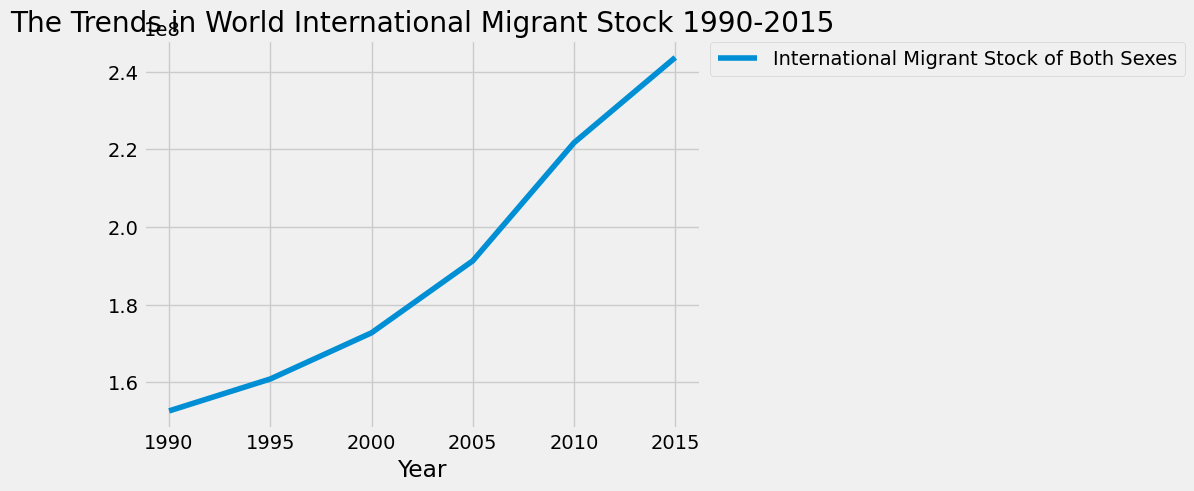

In [52]:
# Data filtered for the whole world
table_world = table_1[table_1.Countrycode == 900]
# Line plot for the world international migrant stock population
fig1 = table_world.plot.line(x = "Year", y = "International Migrant Stock of Both Sexes",
                     title = "The Trends in World International Migrant Stock 1990-2015")
# Move the legend out of the plot
fig1.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

## Figure.2 The Trends in World Annual Rate of Change of the Migrant Stock 1990-2015

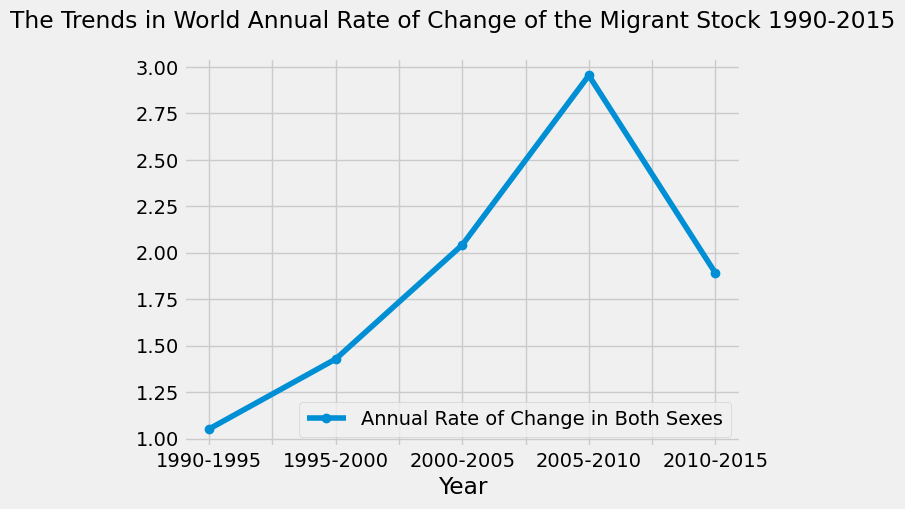

In [53]:
# Data filtered for the whole world
table_world = table_5[table_5['Country code'] == 900]
# Line plot for the world international migrant stock population
fig2 = table_world.plot.line(x = "Year", y = "Annual Rate of Change in Both Sexes", subplots=True, marker = "o",
                     title = "The Trends in World Annual Rate of Change of the Migrant Stock 1990-2015")


In [54]:
# Data filtered for 1990 only
table_1990 = table_1[table_1.Year == "1990"]
# Data filtered for country only (Country code < 900)
table_1990 = table_1990[table_1990.Countrycode < 900]
# Sort by International Migrant Stock of Both Sexes with descending order
table_1990 = table_1990.sort_values(by = ['International Migrant Stock of Both Sexes'],ascending=False).head(5)
table_1990

Area Destination  Countrycode Type of data  Year  \
236  United States of America          840            B  1990   
135        Russian Federation          643            B  1990   
101                     India          356          B R  1990   
137                   Ukraine          804            B  1990   
105                  Pakistan          586          B R  1990   

     International Migrant Stock of Female  \
236                             11878041.0   
135                              5869526.0   
101                              3578808.0   
137                              3939317.0   
105                              2943824.0   

     International Migrant Stock of Both Sexes  \
236                                 23251026.0   
135                                 11524948.0   
101                                  7493204.0   
137                                  6892920.0   
105                                  6208204.0   

     International Migrant Stock of Male  
236                           11372985.0  
135                            5655422.0  
101                            3914396.0  
137                            2953603.0  
105                            3264380.0

## Figure.3 Top 5 Countries of  International Migrant Stock in 1990

([], [])

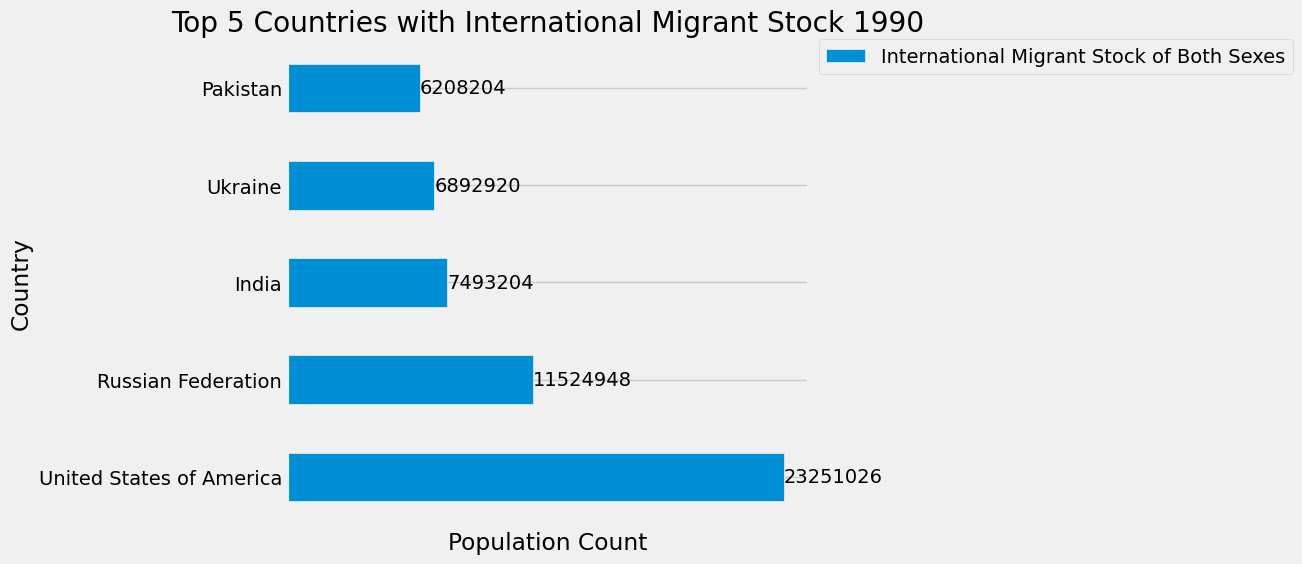

In [55]:
# Plot the bar plot of table_1990
fig3 = table_1990.plot(x = "Area Destination", y = "International Migrant Stock of Both Sexes" ,
                kind = 'barh', 
                title = "Top 5 Countries with International Migrant Stock 1990",
               figsize=(6,6))
# Set the x label
fig3.set(xlabel = 'Population Count')
fig3.set(ylabel = 'Country')
# Set each bars label
for x in fig3.containers:
    fig3.bar_label(x, fmt='%.0f',label_type='edge')
# Move the legend out of the plot
fig3.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
# Remove the ticks from the x-axis
plt.xticks([])


In [56]:
# Data filtered for 2015 only
table_2015 = table_1[table_1.Year == "2015" ]
# Data filtered for country only (Country code < 900)
table_2015 = table_2015[table_2015.Countrycode < 900]
# Sort by International Migrant Stock of Both Sexes with descending order
table_2015 = table_2015.sort_values(by = ['International Migrant Stock of Both Sexes'],ascending=False).head(5)
table_2015

Area Destination  Countrycode  \
1561                           United States of America          840   
1498                                            Germany          276   
1460                                 Russian Federation          643   
1445                                       Saudi Arabia          682   
1476  United Kingdom of Great Britain and Northern I...          826   

     Type of data  Year  International Migrant Stock of Female  \
1561            B  2015                             23802795.0   
1498            B  2015                              6295751.0   
1460            B  2015                              5928065.0   
1445          C R  2015                              3247347.0   
1476            B  2015                              4482928.0   

      International Migrant Stock of Both Sexes  \
1561                                 46627102.0   
1498                                 12005690.0   
1460                                 11643276.0   
1445                                 10185945.0   
1476                                  8543120.0   

      International Migrant Stock of Male  
1561                           22824307.0  
1498                            5709939.0  
1460                            5715211.0  
1445                            6938598.0  
1476                            4060192.0

## Figure.4 Top 5 Countries with International Migrant Stock 2015

([], [])

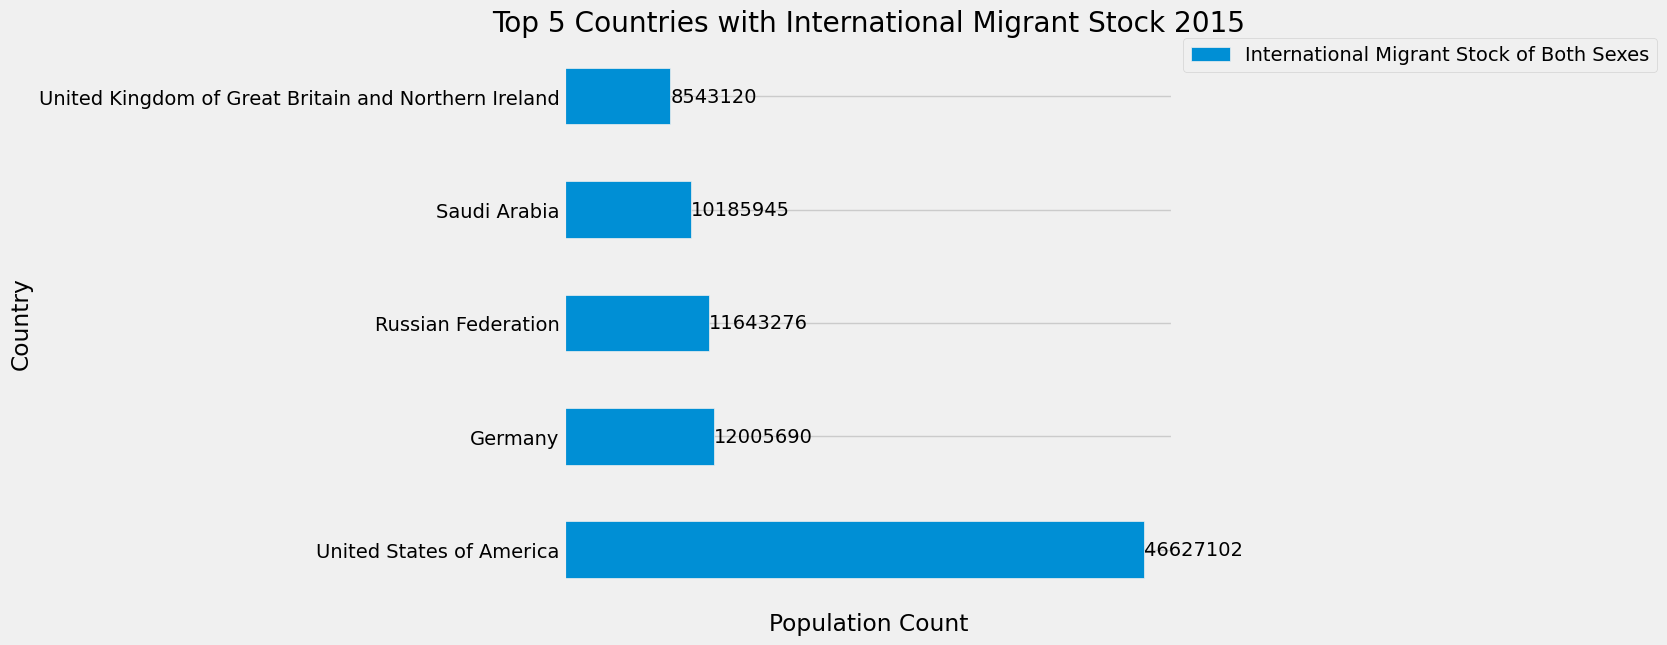

In [57]:
# Plot the bar plot of table_2015
fig4 = table_2015.plot(x = "Area Destination", y = "International Migrant Stock of Both Sexes" ,
                kind = 'barh', 
                title = "Top 5 Countries with International Migrant Stock 2015",
               figsize=(7,7))
# Set the x label
fig4.set(xlabel = 'Population Count')
fig4.set(ylabel = 'Country')
# Set each bars label
for x in fig4.containers:
    fig4.bar_label(x, fmt='%.0f',label_type='edge')
# Move the legend out of the plot
fig4.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
# Remove the ticks from the x-axis
plt.xticks([])


## Figure.5 Top Countries with International Migrant Stock by Sex in 1990-2015 (Separate)
### Following by the samll mutiple principal

Text(0.5, 0.98, 'Top Countries with International Migrant Stock by Sex in 1990-2015')

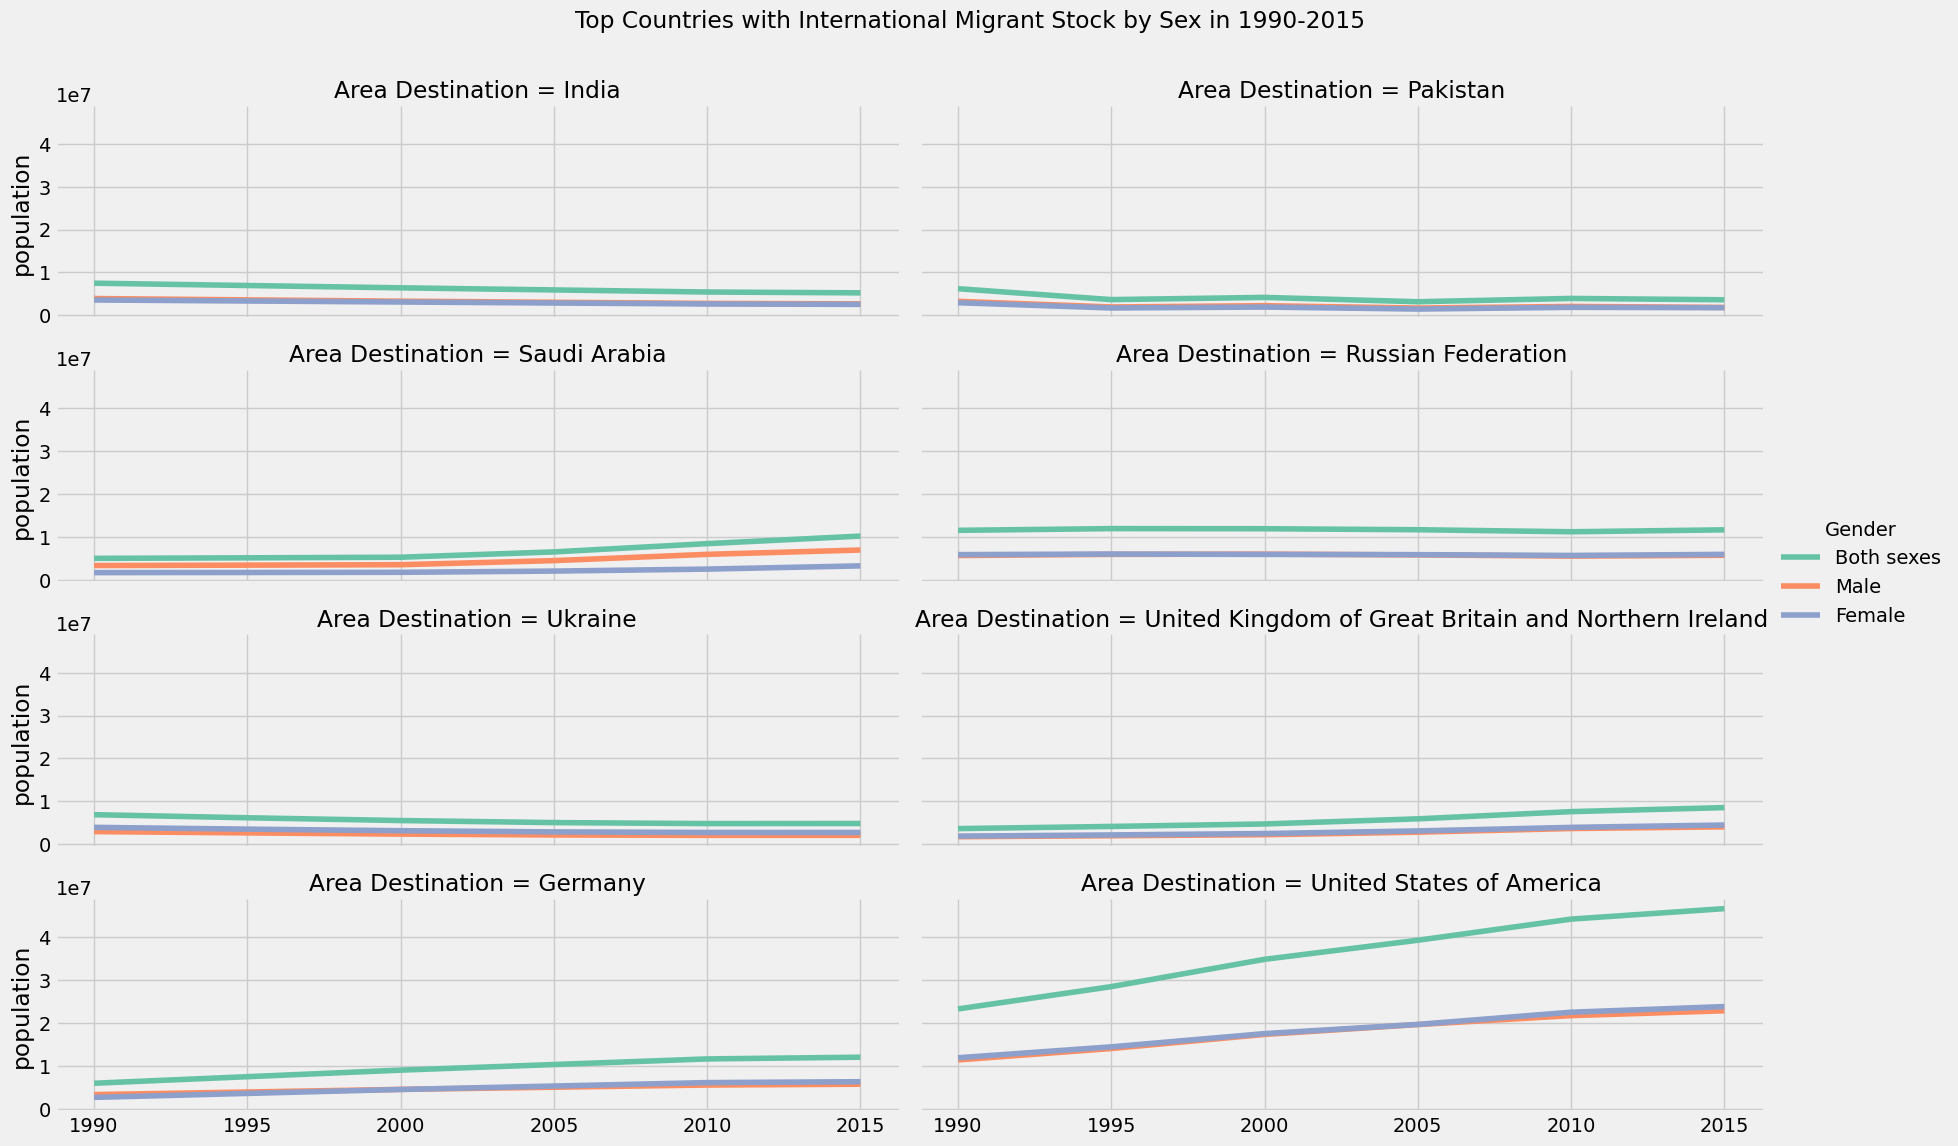

In [58]:
# Seleect the countries(8) mentioned above form a data frame called  tidy_table_1_t
tidy_table_1_t = tidy_table_1[(tidy_table_1["Countrycode"] == 840) | (tidy_table_1["Countrycode"] == 643) | (tidy_table_1["Countrycode"] == 356)|
                   (tidy_table_1["Countrycode"] == 586)|(tidy_table_1["Countrycode"] == 276)|(tidy_table_1["Countrycode"] == 682)|
                    (tidy_table_1["Countrycode"] == 826)|(tidy_table_1["Countrycode"] == 804)]
# Plot the line plots showing the stock by gender in 1990-2015 
fig5 = sns.relplot(
                data= tidy_table_1_t, x="Year", y="Count",
                col="Area Destination", hue="Gender",
                kind="line", palette="Set2", linewidth=4, zorder=7,
                col_wrap=2, height=3, aspect=3, legend=True,
                )
fig5.set_axis_labels("", "population")
# Set the title of the plot
fig5.fig.subplots_adjust(top=0.9)
fig5.fig.suptitle('Top Countries with International Migrant Stock by Sex in 1990-2015')

In [59]:
# Seleect the countries(8) mentioned above form a data frame called  table_top
table_top = table_1[(table_1.Countrycode == 840) | (table_1.Countrycode == 643) | (table_1.Countrycode == 356)|
                   (table_1.Countrycode == 586)|(table_1.Countrycode == 276)|(table_1.Countrycode == 682)|
                    (table_1.Countrycode == 826)|(table_1.Countrycode == 804)]
table_top.head(5)

Area Destination  Countrycode Type of data  Year  \
101               India          356          B R  1990   
105            Pakistan          586          B R  1990   
120        Saudi Arabia          682          C R  1990   
135  Russian Federation          643            B  1990   
137             Ukraine          804            B  1990   

     International Migrant Stock of Female  \
101                              3578808.0   
105                              2943824.0   
120                              1673572.0   
135                              5869526.0   
137                              3939317.0   

     International Migrant Stock of Both Sexes  \
101                                  7493204.0   
105                                  6208204.0   
120                                  4998445.0   
135                                 11524948.0   
137                                  6892920.0   

     International Migrant Stock of Male  
101                            3914396.0  
105                            3264380.0  
120                            3324873.0  
135                            5655422.0  
137                            2953603.0

## Figure.6 Top Countries with International Migrant Stock by Sex in 1990-2015 (Together)

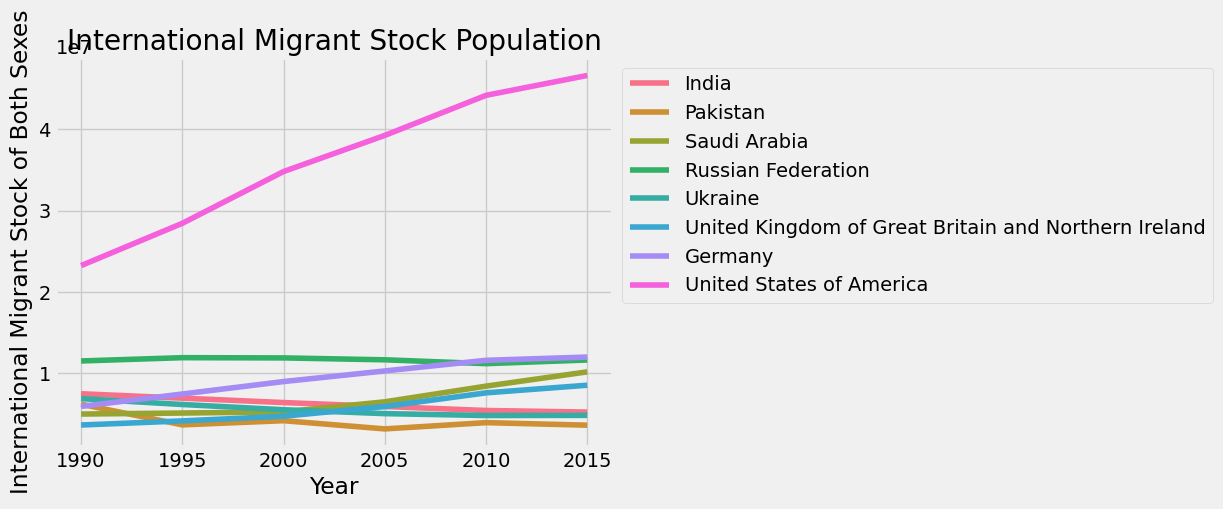

In [60]:
# Plot the line chart with 8 countries' International Migrant Stock together 
fig3 = sns.lineplot(data = table_top, x = "Year", y = "International Migrant Stock of Both Sexes",
                   hue = "Area Destination", sizes = (7,7))
fig3.set(title='International Migrant Stock Population')
# Move the legend out of the plot
fig3.legend(bbox_to_anchor=(1, 1), loc='upper left')

## Figure.7 USA International Migrant Stock V.S. World International Migrant Stock

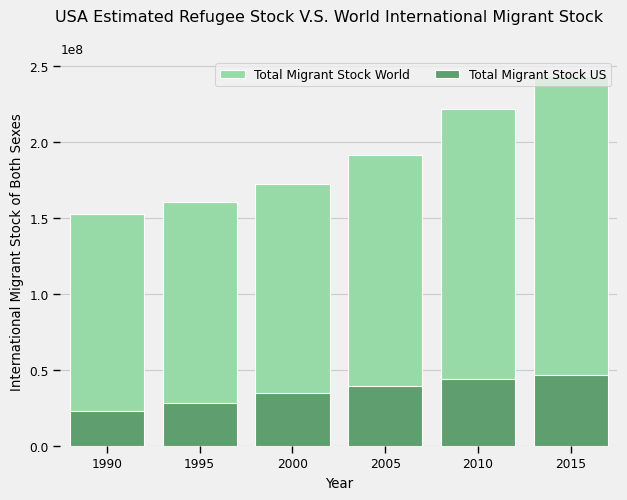

In [61]:
# Data filtered for world only (Country code = 900)
table_1_w = table_1[table_1["Countrycode"] == 900 ]
# Data filtered for USA only (Country code = 840)
table_1_u = table_1[table_1["Countrycode"] == 840 ]
# Plot the barchart of USA Estimated Refugee Stock V.S. International Migrant Stock
sns.set_context('paper')
f, ax = plt.subplots()
sns.set_color_codes('pastel')
sns.barplot(x = 'Year', y = 'International Migrant Stock of Both Sexes', data = table_1_w,label = 'Total Migrant Stock World',
             color = 'g', edgecolor = 'w',ci = False)

sns.set_color_codes('deep')
sns.barplot(x = 'Year', y = 'International Migrant Stock of Both Sexes', data = table_1_u,label = 'Total Migrant Stock US',
             color = 'g', edgecolor = 'w',ci = False)

ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
f.suptitle('USA Estimated Refugee Stock V.S. World International Migrant Stock')
plt.show()

## Figure.8 Top Countries with Estimated Refugee Stock at Mid-year in 1990-2015 

In [62]:
# Selected top countries(8)' Estimated Refugee Stock Each Year
table_topr = table_6_E[(table_6_E["Country code"] == 840) | (table_6_E["Country code"] == 643) | (table_6_E["Country code"] == 356)|
                   (table_6_E["Country code"] == 586)|(table_6_E["Country code"] == 276)|(table_6_E["Country code"] == 682)|
                    (table_6_E["Country code"] == 826)|(table_6_E["Country code"] == 804)]

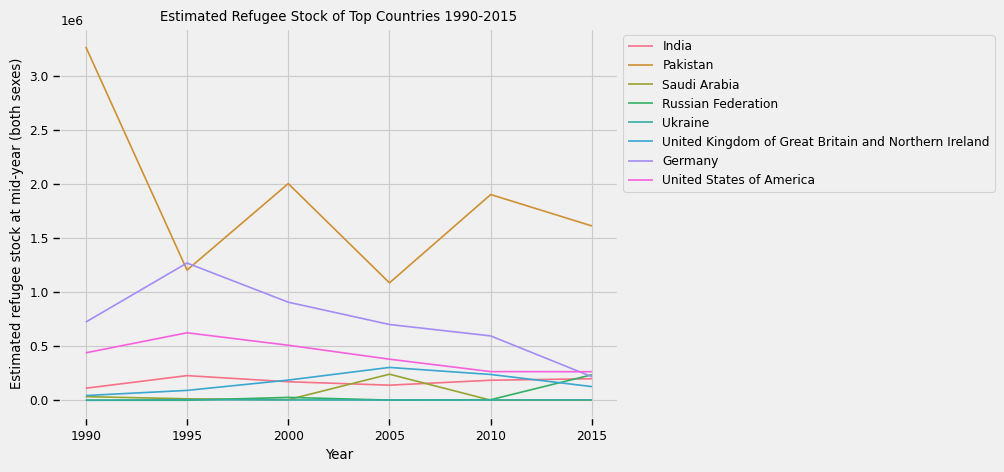

In [63]:
# Plot the line chart with 8 countries' International Migrant Stock of Both Sexes together 
fig8 = sns.lineplot(data = table_topr, x = "Year", y = 'Estimated refugee stock at mid-year (both sexes)',
                   hue = "Area Destination", sizes = (7,7))
fig8.set(title='Estimated Refugee Stock of Top Countries 1990-2015')
# Move the legend out of the plot
fig8.legend(bbox_to_anchor=(1, 1), loc='upper left')


## Figure.9 Pakistan Estimated Refugee Stock V.S. International Migrant Stock

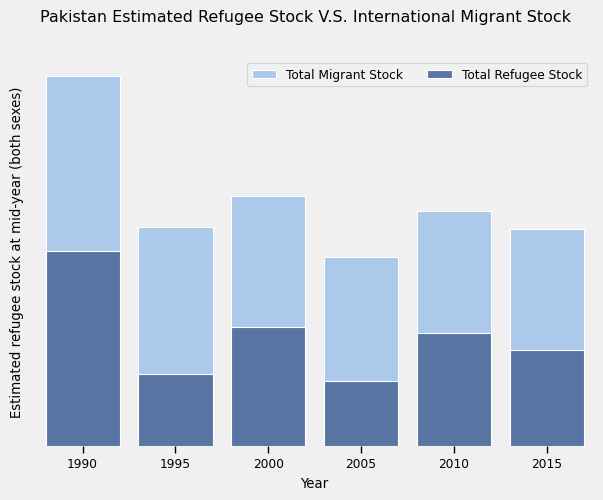

In [64]:
# Data filtered for Pakistan only (Country code = 586)
table_6_E_2 = table_6_E[table_6_E["Country code"] == 586 ]
# Data filtered for Pakistan only (Country code = 586)
table_1_2 = table_1[table_1["Countrycode"] == 586 ]
# Plot the barchart of Pakistan Estimated Refugee Stock V.S. International Migrant Stock
sns.set_context('paper')
f, ax = plt.subplots()
sns.set_color_codes('pastel')
sns.barplot(x = 'Year', y = 'International Migrant Stock of Both Sexes', data = table_1_2,label = 'Total Migrant Stock',
             color = 'b', edgecolor = 'w',ci = False)
sns.set_color_codes('deep')
sns.barplot(x = 'Year', y = 'Estimated refugee stock at mid-year (both sexes)', data = table_6_E_2,
            label = 'Total Refugee Stock', color = 'b', edgecolor = 'w', ci = False)
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
f.suptitle('Pakistan Estimated Refugee Stock V.S. International Migrant Stock')
plt.yticks([])
plt.show()

## Figure.10 Scatter for Female Migrant Percentage of Continents in 1990-2015

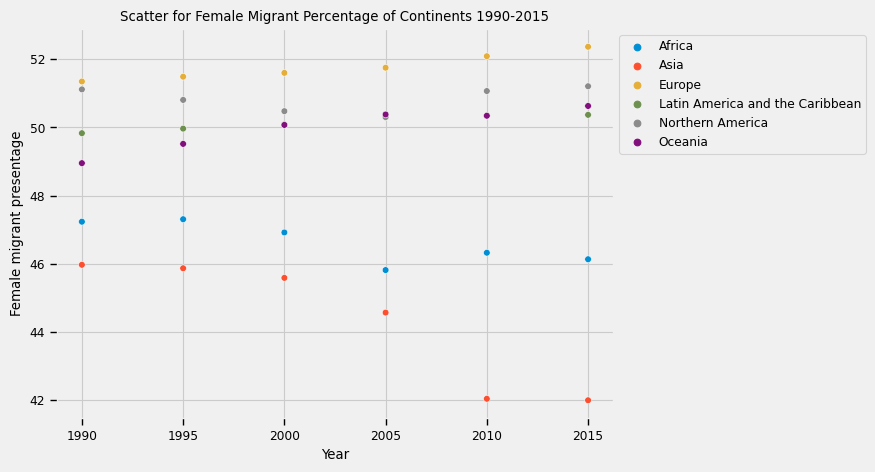

In [65]:
# Select 6 continents from table 4 and form a new data frame called table_4_c
table_4_c = table_4[(table_4["Country code"] == 935) | (table_4["Country code"] == 908) | (table_4["Country code"] == 903)|
                   (table_4["Country code"] == 909)|(table_4["Country code"] == 904)|(table_4["Country code"] == 905)]
# Plot the scatter plot for Female Migrant Persentage of Continets 1990-2015
fig11 = sns.scatterplot(data = table_4_c, x = "Year", y = "Female migrant presentage",hue = "Area Destination")
fig11.set(title='Scatter for Female Migrant Percentage of Continents 1990-2015')
# Move the legend out of the plot
fig11.legend(bbox_to_anchor=(1, 1), loc='upper left')

## Figure.11   Scatter for Female Migrant Percentage of Continents 1990-2015 with Linear Regression (Separate)
### By Using Small Multiple Principal 

In [66]:
# Plot the scatter plot of Continets Female Migrant Persentage 1990-2015 separatly and also add the Linear regression lines
px.scatter(data_frame= table_4_c,
             x = 'Year', y = 'Female migrant presentage',
           labels = {"Female migrant presentage":"Rate"},
           trendline = 'ols',
             facet_col = 'Area Destination',
             facet_col_wrap = 2,
              title = " Scatter for Female Migrant Percentage of Continents 1990-2015 with Linear  Regression")

## Figure.12  Box Plot for Female Migrant Percentage Distribution of Continents in 1990-2015

[Text(0.5, 1.0, 'Box Plot for Female Migrant Percentage Distribution of Continents in 1990-2015')]

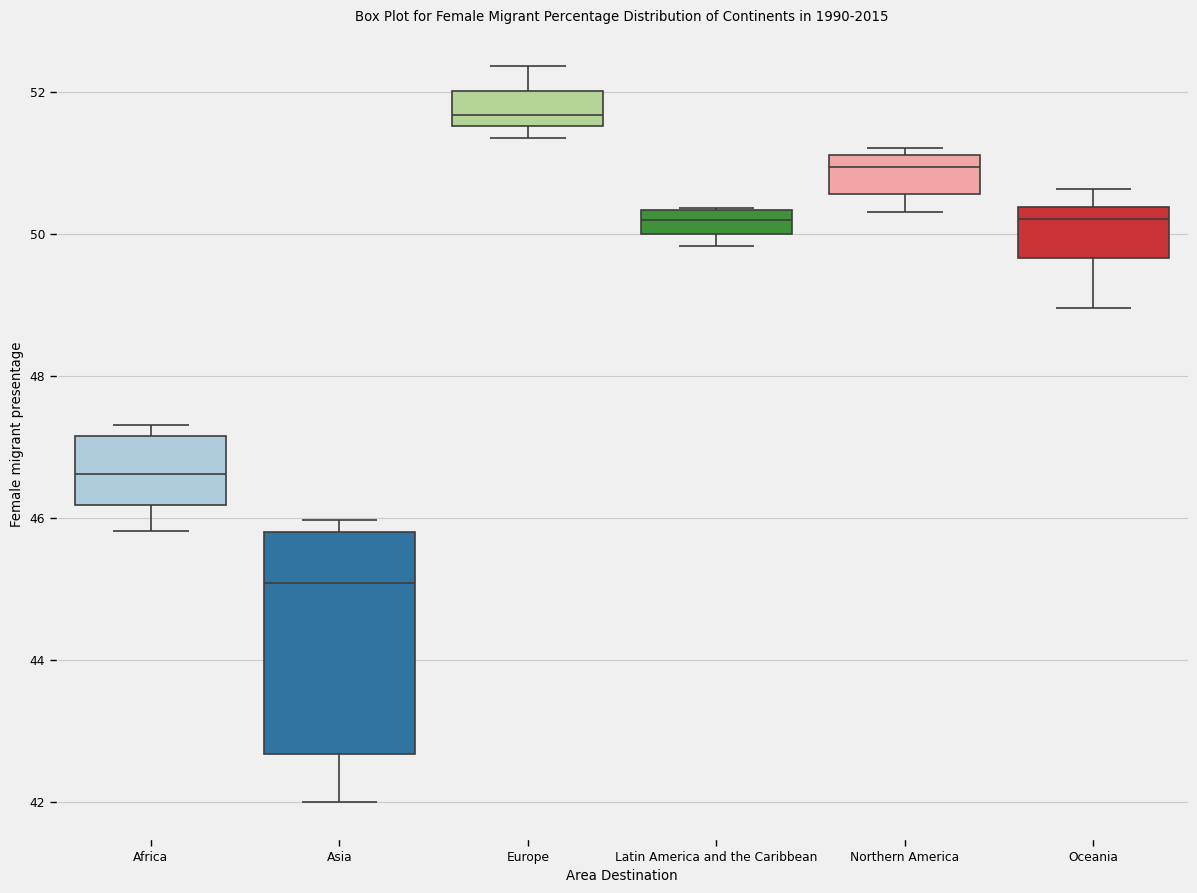

In [67]:
# Set Size
fig12, ax = plt.subplots(figsize=(13,10))
# Plot the boxplot to show the Continets Female Migrant Persentage change in 1990-2015
fig12 = sns.boxplot(data = table_4_c,x = "Area Destination", y = 'Female migrant presentage',palette = 'Paired')
fig12.set(title='Box Plot for Female Migrant Percentage Distribution of Continents in 1990-2015')

## Figure.13 Bar Chart of Estimated Refugee Stock of Continents in 1990-2015 (Separate)

In [68]:
# Select 6 continents from table_6_E and form a new data frame called table_6_Ec
table_6_Ec = table_6_E[(table_6_E["Country code"] == 935) | (table_6_E["Country code"] == 908) | (table_6_E["Country code"] == 903)|
                   (table_6_E["Country code"] == 909)|(table_6_E["Country code"] == 904)|(table_6_E["Country code"] == 905)]
# Plot the bar plot of Continets Estimated refugee stock 1990-2015 separatly 
px.bar(data_frame= table_6_Ec,
             x = 'Year', y = 'Estimated refugee stock at mid-year (both sexes)', 
             labels = {"Estimated refugee stock at mid-year (both sexes)":"refugee stock"} ,
             facet_col = 'Area Destination',
             facet_col_wrap = 2,
             title = "Bar Chart of Estimated Refugee Stock of Continents in 1990-2015")

## Figure.14 Scatter Plot for Estimated Refugee Stock of Continents in 1990-2015 (Separate)

In [69]:
px.scatter(table_6_Ec, x = "Year", y = "Estimated refugee stock at mid-year (both sexes)", color = "Estimated refugee stock at mid-year (both sexes)",
           size_max = 100,hover_name = "Area Destination", facet_col = "Area Destination" ,facet_col_wrap = 2, log_x=True,
           labels = {"Estimated refugee stock at mid-year (both sexes)":"refugee stock"},
           title = 'Scatter Plot for Estimated Refugee Stock of Continents in 1990-2015')

## Figure.15 Line Plot for Annual Rate of Change of the Refugee Stock of Continents in 1990-2015


Text(0.5, 0.98, 'Line Plot for Annual Rate of Change of the Refugee Stock of Continents in 1990-2015')

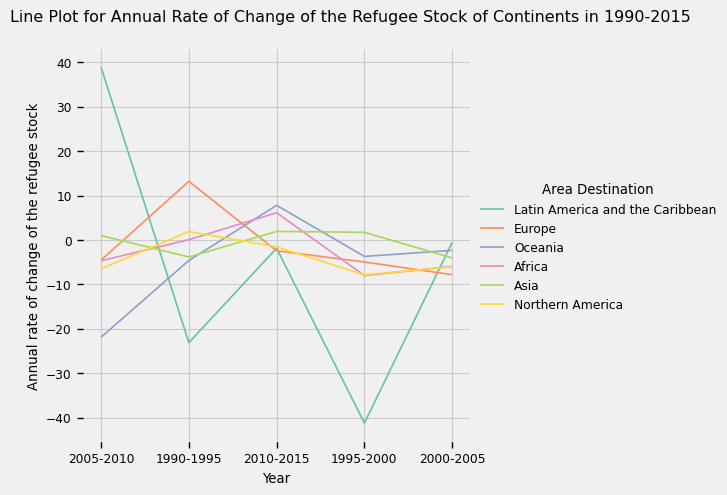

In [70]:
#Filter out the Annual rate of change of the refugee stock for each continent
table_6_A_c = table_6_A[(table_6_A["Country code"] == 935) | (table_6_A["Country code"] == 908) | (table_6_A["Country code"] == 903)|
                   (table_6_A["Country code"] == 909)|(table_6_A["Country code"] == 904)|(table_6_A["Country code"] == 905)]
#Sort by Annual rate of change of the refugee stock descending
table_6_A_c = table_6_A_c.sort_values(by = ['Annual rate of change of the refugee stock'],ascending=False)
# Plot the Annual Rate of Change Refugee Stock for Continets in 1990-2015 Together
fig14 = sns.relplot(data = table_6_A_c, x = "Year", y = "Annual rate of change of the refugee stock", 
                hue = "Area Destination", kind = "line", palette = "Set2")
# Add title to the plot
fig14.fig.subplots_adjust(top=0.9)
fig14.fig.suptitle('Line Plot for Annual Rate of Change of the Refugee Stock of Continents in 1990-2015')

## Figure.16 Violin Plot for Annual Rate of Change of the Refugee Stock of Continents in 1990-2015 

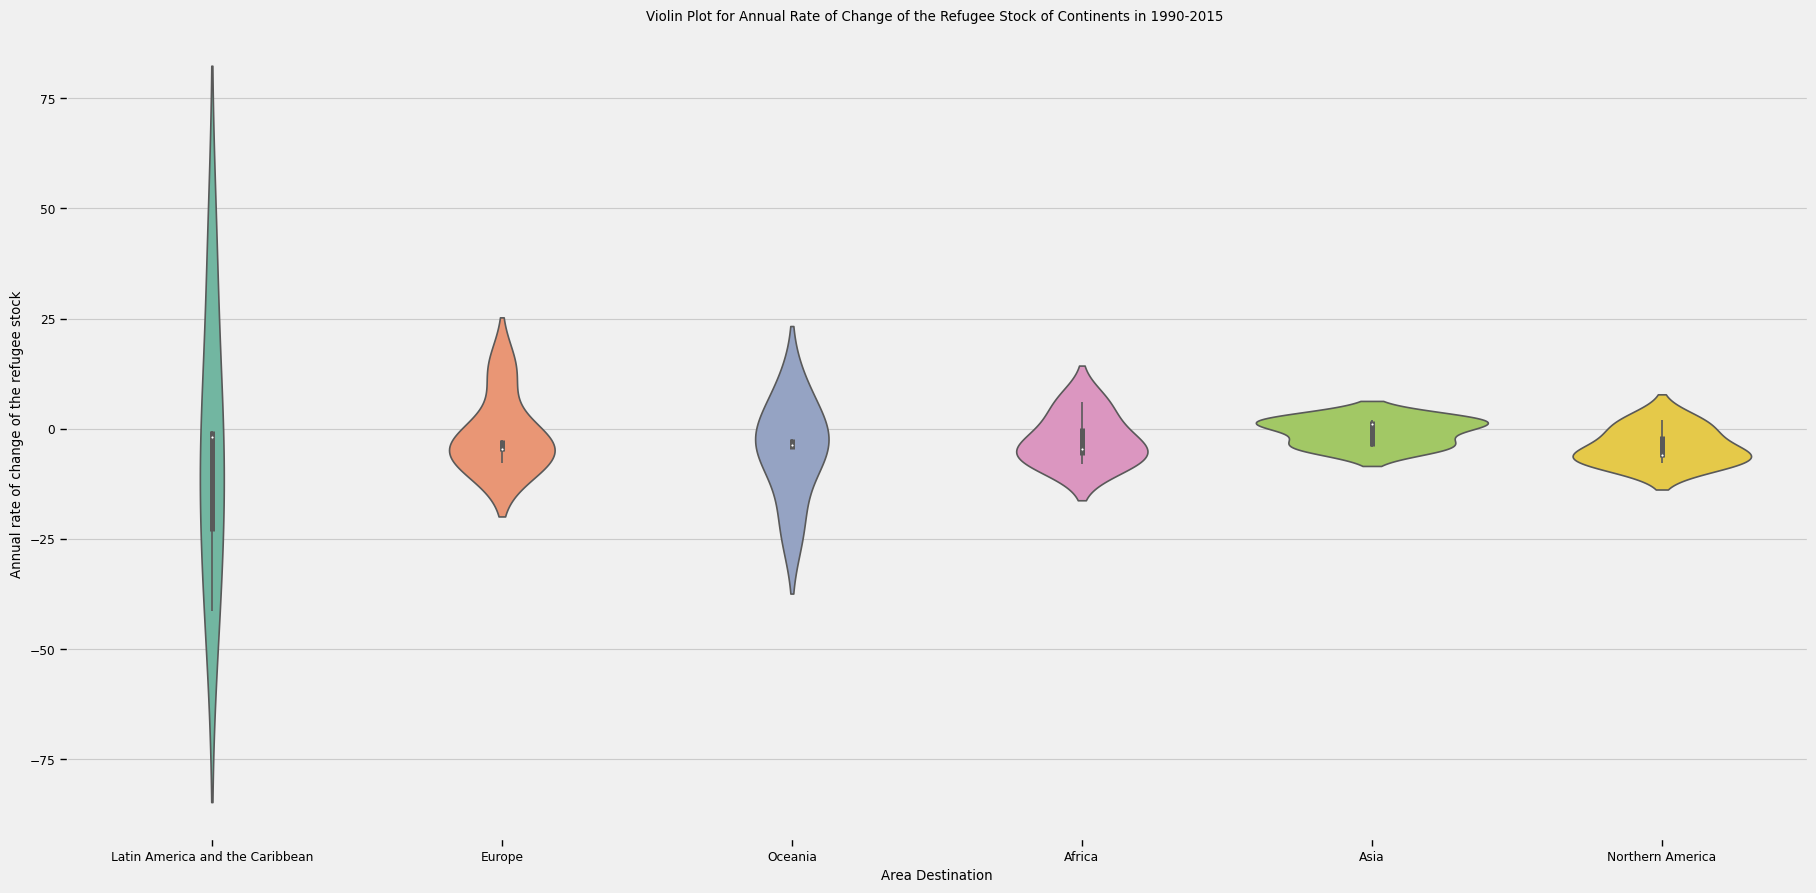

In [71]:
# Set size and title
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Violin Plot for Annual Rate of Change of the Refugee Stock of Continents in 1990-2015 ')
# Plot the violin chart for Annual rate of change of the refugee stock (1990-2015)
sns.violinplot(data = table_6_A_c, x = 'Area Destination', 
             y ='Annual rate of change of the refugee stock' , palette = 'Set2',
              showmeans = False, showmedians = True)
plt.show()

# Figures not mentioned in the write up

In [72]:
# Plot the boxplot to show the Top Countries International Migrant Stock of Gender in 1990-2015
px.box(data_frame = tidy_table_1_t ,x = "Area Destination", y = 'Count',facet_col = 'Area Destination',
             facet_col_wrap = 2,title = 'Box Plot for Top Countries International Migrant Stock of Gender in 1990-2015')

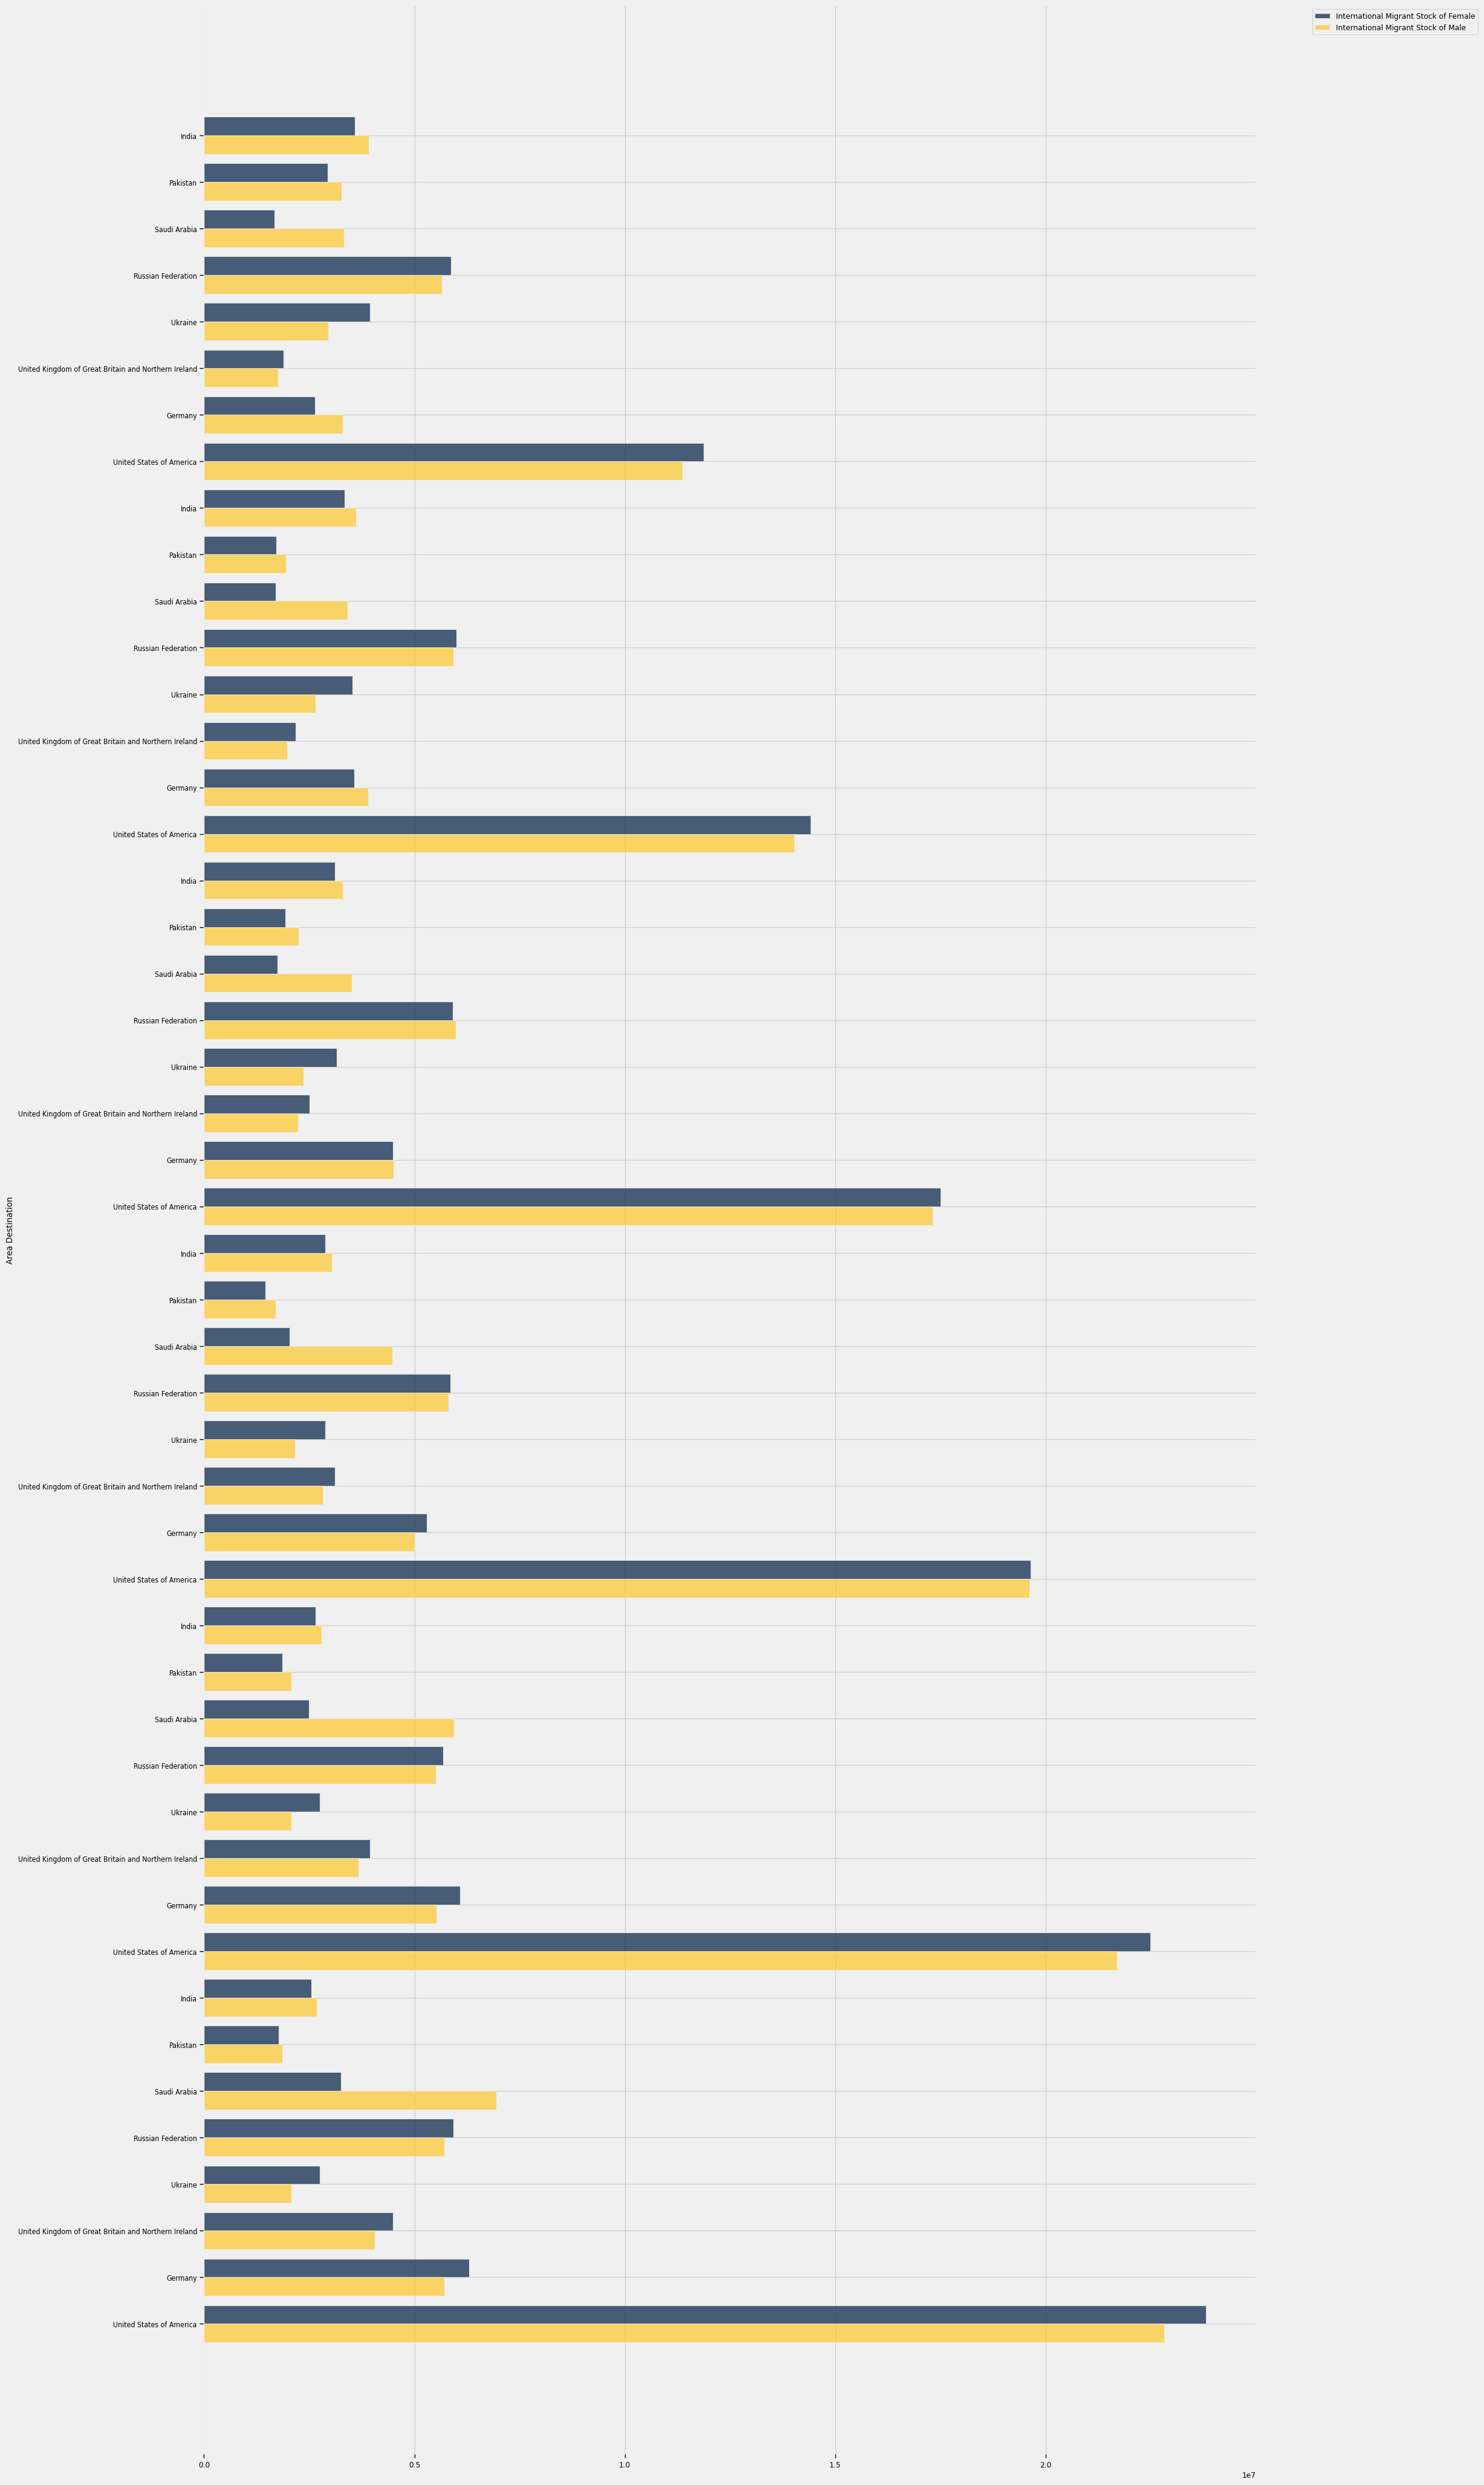

In [73]:
#table_top.to_csv("table_top.csv")
table_topp = Table.read_table('table_top.csv')
table_topp = table_topp.select('Area Destination', 'International Migrant Stock of Female','International Migrant Stock of Male')
table_topp.barh('Area Destination',width=20,height = 50)

In [74]:
# Sort the order of top countries(8)' International Migrant Stock by desendig order
table_top = table_top.sort_values(by = ['International Migrant Stock of Both Sexes'],ascending=False)
# Plot the line plots showing the International Migrant Stock in 1990-2015 separatly.
px.line(data_frame= table_top,
        x = 'Year', y = 'International Migrant Stock of Both Sexes', 
        labels = {"International Migrant Stock of Both Sexes":"Population"} ,
        facet_col = 'Area Destination',facet_col_wrap = 2)

In [75]:
# Plot the bar plots showing the Estimated Refugee Stock of top countries(8) in 1990-2015 separatly.
px.bar(data_frame= table_topr,
             x = 'Year', y = 'Estimated refugee stock at mid-year (both sexes)', 
        labels = {"Estimated refugee stock at mid-year (both sexes)":"refugee stock"} ,
             facet_col = 'Area Destination',
             facet_col_wrap = 2)

In [76]:
# Select 6 continents from table 4 and form a new data frame called table_4_c
table_4_c = table_4[(table_4["Country code"] == 935) | (table_4["Country code"] == 908) | (table_4["Country code"] == 903)|
                   (table_4["Country code"] == 909)|(table_4["Country code"] == 904)|(table_4["Country code"] == 905)]
# Plot the scatter plot of Continets Female Migrant Persentage 1990-2015 separatly and also add the local regression lines
px.scatter(data_frame= table_4_c,
             x = 'Year', y = 'Female migrant presentage',
           labels = {"Female migrant presentage":"Rate"},
           trendline = 'lowess',
             facet_col = 'Area Destination',
             facet_col_wrap = 2)

In [77]:
#Plot the scatter plot of Continets Estimated refugee stock 1990-2015 separatly separatly and also add the local regression lines
px.scatter(data_frame= table_6_Ec,
             x = 'Year', y = 'Estimated refugee stock at mid-year (both sexes)', 
        labels = {"Estimated refugee stock at mid-year (both sexes)":"refugee stock"} ,
             facet_col = 'Area Destination',
           trendline = "lowess",
             facet_col_wrap = 2)